# SHELL DATATHON
## Akaryakıt İstasyonlarında Tedarik Zinciri
##### Shell & Turcas’ın Türkiye genelinde üç adet kendi işlettiği ve dört adet de müşterek işletilen olmak üzere toplam yedi adet akaryakıt terminali bulunmaktadır. Akaryakıt istasyonlarına yapılan ürün ikmali Shell & Turcas ve hizmet alınan diğer akaryakıt terminallerinden kara yolu nakliye araçları ile yapılmaktadır. İstasyonların vermiş oldukları sipariş miktarları satış hacimlerine ve akaryakıt fiyatlarına bağlı olarak değişkenlik göstermektedir.

## Ne Üretmenizi Bekliyoruz?
##### Bu datathon kapsamında, Shell Türkiye akaryakıt istasyonlarının 2019 yılındaki haftalık bazda akaryakıt depolama terminallerinden aldıkları akaryakıt ürün türünü ve miktarlarını tahminleyeceğiz.

## Akaryakıtta Eşel Mobil
##### Akaryakıt sektöründe eşel mobil; benzin, motorin ve otogaz gibi akaryakıt ürünlerinden alınan ÖTV'nin (özel tüketim vergisi) fiyat artışlarına göre indirgenmesi ya da yükseltilmesiyle uygulanan bir sistemdir.

##### Bu sistemle petrol fiyatlarında ve kurda meydana gelebilecek değişimler karşısında vergi miktarları, değişimin yönüne bağlı olarak ters orantılı çalışır. Uluslararası petrol fiyatları ve döviz kurlarında artış olduğunda ve akaryakıta zam yapılması gerektiğinde bu miktar kadar vergi indirimi gerçekleştirilir.

##### Eşel mobil ilk defa 17 Mayıs 2018 ve 8 Ocak 2019 tarihleri arasında uygulandı.

## Dataset Description
### Dosya
* price.csv - Satış fiyatları
* test.csv - Test veri seti
* train.csv - Training veri seti
* sample_submission.csv – Örnek submission dosyası

### Açıklamalar
* Customer: Akaryakıt istasyonu ID bilgisidir.
* Area: Akaryakıt istasyonunun bulunduğu coğrafi bölgedir.
* City Code: Akaryakıt istasyonunun bulunduğu il kodudur.
* Billing Date: Akaryakıt istasyonunun sipariş verdiği tarih
* Product: Akaryakıt istasyonunun sipariş verdiği akaryakıt türü
* Litres: Akaryakıt istasyonunun sipariş verdiği akaryakıt miktarı
* Plant: Akaryakıt istasyonuna ikmal yapılan terminal kodudur.
* ValidFrom: Pompa fiyat tarihleri (Dağıtım şirketi tarafından, depo satış fiyatı üzerine bayinin çeşitli masrafları ve bulunduğu bölgenin nakliye ücretlerinin de eklenmesiyle, tavsiye edilen pompa satış fiyatı oluşturulur ve bayilere bildirilir.)
* CRP: Akaryakıt istasyonu pompa fiyatları

### Dış Veri Kullanımı
##### Hava durumu, okulların açılış/kapanış günleri, resmi ve dini bayramlara ilişkin tarihler, trafik verileri gibi modelin kurulumunda size faydalı olabileceğini düşündüğünüz her türlü halka açık veriyi kullanabilirsiniz.

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy


import missingno as msno
from datetime import date
#Hierarchical clustering with the Sci Py library. We'll use the dendrogram and linkage modules.
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# some settings
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",None)
pd.set_option("display.float_format",lambda x: '%.3f' %x)
pd.set_option("display.width",500)

In [2]:
# load datasets
def load_data(dataframe,parse_dates):
    return pd.read_csv(dataframe,parse_dates=parse_dates)

In [3]:
train = pd.read_csv("train.csv",parse_dates=["Billing Date"])
test = pd.read_csv("test.csv",parse_dates=["Week Start Date"])
price = pd.read_csv("price.csv",parse_dates=["Validfrom"])
submission = pd.read_csv("sample_submission.csv")

##### Member Work

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [19]:
member = pd.read_csv("member.csv")
member_test = pd.read_csv("member_test.csv")

In [20]:
member

,Customer,Billing Date,Litres,Area,City Code,Product,Plant,CRP,Week_Number,Sehir,Nüfus,Taşıt Sayısı,Taşıt Sayısının Nüfusa Oranı
0,10048261.000,2014-01-05,29017.000,Karadeniz Bölgesi,883.000,Motorin,9.000,4.400,1.000,Ordu,771932,135490,17.600
1,10048261.000,2014-01-12,55606.000,Karadeniz Bölgesi,883.000,Motorin,9.000,3.970,2.000,Ordu,771932,135490,17.600
2,10048261.000,2014-01-19,28758.000,Karadeniz Bölgesi,883.000,Motorin,9.000,4.580,3.000,Ordu,771932,135490,17.600
3,10048261.000,2014-01-26,46670.000,Karadeniz Bölgesi,883.000,Motorin,9.000,4.580,4.000,Ordu,771932,135490,17.600
4,10048261.000,2014-02-02,44307.000,Karadeniz Bölgesi,883.000,Motorin,9.000,4.650,5.000,Ordu,771932,135490,17.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
467519,12614364.000,2018-12-23,1167.000,Doğu Anadolu Bölgesi,304.000,Benzin,5.000,6.330,51.000,Bitlis,349396,22618,6.500
467520,12663274.000,2018-12-16,20935.000,Doğu Anadolu Bölgesi,518.000,Motorin,12.000,6.100,50.000,Ardahan,98907,19438,19.700
467521,12663274.000,2018-12-30,17102.000,Doğu Anadolu Bölgesi,518.000,Motorin,12.000,5.840,52.000,Ardahan,98907,19438,19.700
467522,12663274.000,2018-12-16,9620.000,Doğu Anadolu Bölgesi,518.000,Benzin,12.000,6.300,50.000,Ardahan,98907,19438,19.700


In [21]:
member_test

,index,Customer,Area,City Code,Product,Billing Date,CRP,Week_Number,Plant,Sehir,Nüfus,Taşıt Sayısı,Taşıt Sayısının Nüfusa Oranı
0,0.000,10048261.000,Karadeniz Bölgesi,883.000,Motorin,2019-01-07,5.760,2.000,9.000,Ordu,771932.000,135490.000,17.600
1,1.000,10048261.000,Karadeniz Bölgesi,883.000,Motorin,2019-01-14,5.940,3.000,9.000,Ordu,771932.000,135490.000,17.600
2,2.000,10048261.000,Karadeniz Bölgesi,883.000,Motorin,2019-01-21,6.140,4.000,9.000,Ordu,771932.000,135490.000,17.600
3,3.000,10048261.000,Karadeniz Bölgesi,883.000,Motorin,2019-01-28,6.140,5.000,9.000,Ordu,771932.000,135490.000,17.600
4,4.000,10048261.000,Karadeniz Bölgesi,883.000,Motorin,2019-02-04,6.140,6.000,9.000,Ordu,771932.000,135490.000,17.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108467,107063.000,12663274.000,Doğu Anadolu Bölgesi,518.000,Benzin,2019-12-02,7.110,49.000,5.000,Ardahan,98907.000,19438.000,19.700
108468,107064.000,12663274.000,Doğu Anadolu Bölgesi,518.000,Benzin,2019-12-09,7.110,50.000,12.000,Ardahan,98907.000,19438.000,19.700
108469,107065.000,12663274.000,Doğu Anadolu Bölgesi,518.000,Benzin,2019-12-16,7.110,51.000,12.000,Ardahan,98907.000,19438.000,19.700
108470,107066.000,12663274.000,Doğu Anadolu Bölgesi,518.000,Benzin,2019-12-23,7.110,52.000,12.000,Ardahan,98907.000,19438.000,19.700


In [5]:
sehirler = pd.read_csv('şehirler benzin motorin - Sayfa1.csv')

In [6]:
sehirler

,Unnamed: 0,Benzin,Motorin,Area,Yıl
0,Adana,15600,80200,Akdeniz Bölgesi,2016
1,Adıyaman,1132,4187,Güneydoğu Anadolu,2016
2,Afyonkarahisar,3000,26000,Ege Bölgesi,2016
3,Ağrı,0,0,Doğu Anadolu Bölgesi,2016
4,Amasya,815,14740,Karadeniz Bölgesi,2016
...,...,...,...,...,...
481,Yalova,3054,15430,Marmara Bölgesi,2014
482,Karabük,2299,31339,Karadeniz Bölgesi,2014
483,Kilis,897,2939,Güneydoğu Anadolu,2014
484,Osmaniye,1268,9084,Akdeniz Bölgesi,2014


In [7]:
sehirler.rename(columns = {'Unnamed: 0':'Sehir'},inplace = True)
sehirler.rename(columns = {'Yıl':'year'},inplace = True)

In [8]:
sehirler

,Sehir,Benzin,Motorin,Area,year
0,Adana,15600,80200,Akdeniz Bölgesi,2016
1,Adıyaman,1132,4187,Güneydoğu Anadolu,2016
2,Afyonkarahisar,3000,26000,Ege Bölgesi,2016
3,Ağrı,0,0,Doğu Anadolu Bölgesi,2016
4,Amasya,815,14740,Karadeniz Bölgesi,2016
...,...,...,...,...,...
481,Yalova,3054,15430,Marmara Bölgesi,2014
482,Karabük,2299,31339,Karadeniz Bölgesi,2014
483,Kilis,897,2939,Güneydoğu Anadolu,2014
484,Osmaniye,1268,9084,Akdeniz Bölgesi,2014


##### My Work

In [22]:
# first 5 observations for train set
train.head()

,Customer,Area,City Code,Billing Date,Product,Plant,Litres
0,10048261,Karadeniz Bölgesi,883,2014-01-01,Benzin,T102,0.000
1,10048261,Karadeniz Bölgesi,883,2014-01-01,Benzin,T155,0.000
2,10048261,Karadeniz Bölgesi,883,2014-01-01,Motorin,T102,0.000
3,10048261,Karadeniz Bölgesi,883,2014-01-01,Motorin,T155,0.000
4,10048261,Karadeniz Bölgesi,883,2014-01-02,Motorin,T155,16685.000


In [32]:
train.shape

(1379260, 7)

In [33]:
# last 5 observations for train set
train.tail()

,Customer,Area,City Code,Billing Date,Product,Plant,Litres
1379255,12663344,Doğu Anadolu Bölgesi,218,2018-12-22,Motorin,T317,1504.000
1379256,12663344,Doğu Anadolu Bölgesi,218,2018-12-28,Benzin,T317,11111.000
1379257,12663344,Doğu Anadolu Bölgesi,218,2018-12-28,Motorin,T317,22882.000
1379258,12664221,Marmara Bölgesi,941,2018-12-29,Benzin,T102,6528.000
1379259,12664221,Marmara Bölgesi,941,2018-12-29,Motorin,T102,26314.000


In [34]:
# min date in train set
train["Billing Date"].min()

Timestamp('2014-01-01 00:00:00')

In [35]:
# max date in train set
train["Billing Date"].max()

Timestamp('2018-12-31 00:00:00')

In [36]:
# first 5 observations for test set
test.head()

,index,Customer,Area,City Code,Product,Week Start Date
0,0,10048261,Karadeniz Bölgesi,883,Motorin,2019-01-07
1,1,10048261,Karadeniz Bölgesi,883,Motorin,2019-01-14
2,2,10048261,Karadeniz Bölgesi,883,Motorin,2019-01-21
3,3,10048261,Karadeniz Bölgesi,883,Motorin,2019-01-28
4,4,10048261,Karadeniz Bölgesi,883,Motorin,2019-02-04


In [37]:
# last 5 observations for test set
test.tail() 

,index,Customer,Area,City Code,Product,Week Start Date
108467,108467,12739737,Doğu Anadolu Bölgesi,194,Benzin,2019-12-02
108468,108468,12739737,Doğu Anadolu Bölgesi,194,Benzin,2019-12-09
108469,108469,12739737,Doğu Anadolu Bölgesi,194,Benzin,2019-12-16
108470,108470,12739737,Doğu Anadolu Bölgesi,194,Benzin,2019-12-23
108471,108471,12739737,Doğu Anadolu Bölgesi,194,Benzin,2019-12-30


In [38]:
# min date in test set
test["Week Start Date"].min()

Timestamp('2019-01-07 00:00:00')

In [39]:
# max date in test set
test["Week Start Date"].max()

Timestamp('2019-12-30 00:00:00')

In [40]:
# first 5 observations for price set
price.head()

,City Code,Validfrom,Product,CRP
0,116,2016-07-27,Benzin,4.460
1,116,2016-07-28,Benzin,4.460
2,116,2016-07-29,Benzin,4.460
3,116,2016-07-30,Benzin,4.400
4,116,2016-07-31,Benzin,4.400


In [41]:
# last 5 observations for price set
price.tail()

,City Code,Validfrom,Product,CRP
311739,990,2019-12-27,Motorin,6.740
311740,990,2019-12-28,Motorin,6.740
311741,990,2019-12-29,Motorin,6.740
311742,990,2019-12-30,Motorin,6.740
311743,990,2019-12-31,Motorin,6.740


In [42]:
# min date in price set
price["Validfrom"].min()

Timestamp('2014-01-01 00:00:00')

In [43]:
# max date in price set
price["Validfrom"].max()

Timestamp('2019-12-31 00:00:00')

In [44]:
# check dataframe
def check_dataframe(dataframe,quantiles = [0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.99,1]):
    print(f"Observations:{dataframe.shape[0]}\nVariables:{dataframe.shape[1]}")
    print("************************************************")
    print(f"Variable Types\n{dataframe.dtypes}")
    print("************************************************")
    print(f"NaN Values\n{dataframe.isnull().sum()}")
    print("************************************************")
    print(f"Describe of Data\n{dataframe.describe(quantiles)}")
    print("************************************************")
    print(f"Describe of Data-Categorical\n{dataframe.describe(include=['O'])}")

In [45]:
# check train set
check_dataframe(train)

Observations:1379260
Variables:7
************************************************
Variable Types
Customer                 int64
Area                    object
City Code                int64
Billing Date    datetime64[ns]
Product                 object
Plant                   object
Litres                 float64
dtype: object
************************************************
NaN Values
Customer        0
Area            0
City Code       0
Billing Date    0
Product         0
Plant           0
Litres          0
dtype: int64
************************************************
Describe of Data
          Customer   City Code      Litres
count  1379260.000 1379260.000 1379260.000
mean  10581312.622     698.522   14055.202
std     937804.625     232.538   10937.352
min   10048261.000     116.000       0.000
10%   10049027.000     367.000    3522.000
20%   10049240.000     466.000    4777.000
25%   10049354.000     574.000    5034.000
30%   10049413.000     574.000    5964.000
40%   10049568.000  

In [46]:
# check test set
check_dataframe(test)

Observations:108472
Variables:6
************************************************
Variable Types
index                       int64
Customer                    int64
Area                       object
City Code                   int64
Product                    object
Week Start Date    datetime64[ns]
dtype: object
************************************************
NaN Values
index              0
Customer           0
Area               0
City Code          0
Product            0
Week Start Date    0
dtype: int64
************************************************
Describe of Data
           index     Customer  City Code
count 108472.000   108472.000 108472.000
mean   54235.500 10899830.302    679.733
std    31313.314  1114907.815    240.298
min        0.000 10048261.000    116.000
10%    10847.100 10049065.000    320.000
20%    21694.200 10049289.000    434.000
25%    27117.750 10049389.000    570.000
30%    32541.300 10049479.000    574.000
40%    43388.400 10049699.000    667.000
50%    5423

In [47]:
# check price set
check_dataframe(price)

Observations:311744
Variables:4
************************************************
Variable Types
City Code             int64
Validfrom    datetime64[ns]
Product              object
CRP                 float64
dtype: object
************************************************
NaN Values
City Code    0
Validfrom    0
Product      0
CRP          0
dtype: int64
************************************************
Describe of Data
       City Code        CRP
count 311744.000 311744.000
mean     596.254      5.158
std      256.890      1.015
min      116.000      3.220
10%      197.000      3.900
20%      321.000      4.310
25%      418.000      4.390
30%      434.000      4.460
40%      532.000      4.660
50%      621.000      4.980
60%      676.000      5.200
70%      789.000      5.720
75%      812.000      6.090
80%      865.000      6.310
90%      936.000      6.660
99%      990.000      7.180
100%     990.000      7.380
max      990.000      7.380
***********************************************

In [107]:
# rename column names
train.rename(columns={"Billing Date":"date_of_price"},inplace = True)
test.rename(columns={"Week Start Date":"date_of_price"}, inplace = True)
price.rename(columns={"Validfrom":"date_of_price"}, inplace = True)

In [108]:
price["date_of_price"]=pd.to_datetime(price["date_of_price"])
train["date_of_price"]=pd.to_datetime(train["date_of_price"])
test["date_of_price"]=pd.to_datetime(test["date_of_price"])

train["month"] = train.date_of_price.dt.month
train["week"] = train.date_of_price.dt.isocalendar().week
train["year"] = train.date_of_price.dt.year
train["season"] = train.date_of_price.dt.quarter


test["month"] = test.date_of_price.dt.month
test["week"] = test.date_of_price.dt.isocalendar().week
test["year"] = test.date_of_price.dt.year
test["season"] = test.date_of_price.dt.quarter

price["month"] = price.date_of_price.dt.month
price["week"] = price.date_of_price.dt.isocalendar().week
price["year"] = price.date_of_price.dt.year
price["season"] = price.date_of_price.dt.quarter

In [109]:
train.drop("Plant",axis = 1, inplace = True)

In [51]:
train_litres = train.groupby(["Customer","Product","year","week"]).agg({"Litres":["sum"]}).reset_index()
train = train.merge(train_litres,on = ["Customer","Product","year","week"])
new_train = train.drop_duplicates(subset=["Customer","Product","week","year"])

C:\Users\akdog\AppData\Local\Temp\ipykernel_15912\3141230398.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  train = train.merge(train_litres,on = ["Customer","Product","year","week"])
C:\Users\akdog\AppData\Local\Temp\ipykernel_15912\3141230398.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  train = train.merge(train_litres,on = ["Customer","Product","year","week"])


In [52]:
new_train.drop("Litres",axis =  1, inplace = True)

C:\Users\akdog\AppData\Local\Temp\ipykernel_15912\363049595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train.drop("Litres",axis =  1, inplace = True)


In [64]:
new_train.columns

Index(['Customer', 'Area', 'City Code', 'date_of_price', 'Product', 'Litres', 'year', 'Sehir', 'Yakıt', 'Month', 'Oran', 'month', 'week', 'season'], dtype='object')

In [54]:
new_train.columns = ["Customer","Area","City Code","date_of_price","Product","month","week","year","season","Litres"]

In [7]:
def merge_data(dataframe):
    dataframe = dataframe.merge(price, on = ["City Code","Product","date_of_price"])
    return dataframe

In [8]:
# merge train and price datasets 
df = merge_data(train)

In [9]:
# merge test and price datasets
df_test = merge_data(test)

In [82]:
check_dataframe(df)

Observations:475238
Variables:15
************************************************
Variable Types
Customer                  int64
Area                     object
City Code                 int64
date_of_price    datetime64[ns]
Product                  object
month_x                   int64
week_x                   UInt32
year_x                    int64
season_x                  int64
Litres                  float64
CRP                     float64
month_y                   int64
week_y                   UInt32
year_y                    int64
season_y                  int64
dtype: object
************************************************
NaN Values
Customer         0
Area             0
City Code        0
date_of_price    0
Product          0
month_x          0
week_x           0
year_x           0
season_x         0
Litres           0
CRP              0
month_y          0
week_y           0
year_y           0
season_y         0
dtype: int64
************************************************
De

In [10]:
# Kategorik Değişkenleri, Sayısal Değişkenleri ve Kategorik ama Kardinalite Olan Değişkenleri Bulalım
def grab_cat_num_cols(dataframe,cat_threshold=10,car_threshold=20):
    cat_cols=[col for col in dataframe.columns if str(dataframe[col].dtypes) in ["object","category","bool"]]
    cat_but_num=[col for col in dataframe.columns if dataframe[col].dtypes in ["int64","int32","float64","float32"] and dataframe[col].nunique()<cat_threshold]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique()>car_threshold and str(dataframe[col].dtypes) in ["object","category"]]
    cat_cols= cat_cols+cat_but_num
    cat_cols=[col for col in cat_cols if col not in cat_but_car]

    num_cols=[col for col in dataframe.columns if dataframe[col].dtypes in ["int64","float64"]]
    num_cols=[col for col in num_cols if col not in cat_cols]

    print(f"Observations:{dataframe.shape[0]}")
    print(f"Variables:{dataframe.shape[1]}")
    print(f"cat_cols:{len(cat_cols)}")
    print(f"num_cols:{len(num_cols)}")
    print(f"cat_but_car:{len(cat_but_car)}")
    print(f"cat_but_num:{len(cat_but_num)}")
    return cat_cols, num_cols, cat_but_car

In [11]:
cat_cols , num_cols , cat_but_car = grab_cat_num_cols(df)

Observations:1359589
Variables:15
cat_cols:6
num_cols:6
cat_but_car:0
cat_but_num:4


In [12]:
cat_cols 

['Area', 'Product', 'year_x', 'season_x', 'year_y', 'season_y']

In [13]:
num_cols

['Customer', 'City Code', 'Litres', 'month_x', 'CRP', 'month_y']

In [71]:
cat_but_car

['Sehir']

In [88]:
def cat_summary(dataframe,col_name,plot=False):
    print(pd.DataFrame({col_name:dataframe[col_name].value_counts(),
                  f"Ratio-{col_name}":100*dataframe[col_name].value_counts()/len(dataframe)}))
    print("###################################################################################")
    if plot:
        sns.countplot(x=dataframe[col_name],data=dataframe,hue="Plant")
        plt.xticks(rotation=45)
        plt.show(block=True)

                             Area  Ratio-Area
Marmara Bölgesi            576621      42.411
Ege Bölgesi                222671      16.378
İç Anadolu Bölgesi         209879      15.437
Akdeniz Bölgesi            169620      12.476
Karadeniz Bölgesi           98069       7.213
Güneydoğu Anadolu Bölgesi   53914       3.965
Doğu Anadolu Bölgesi        28815       2.119
###################################################################################


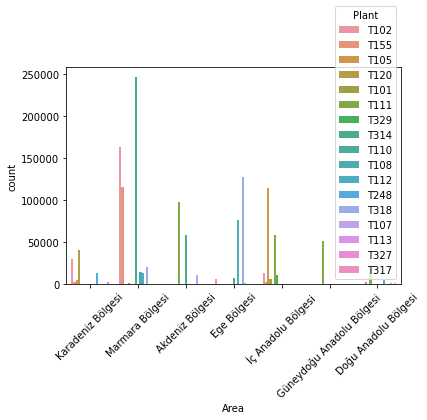

         Product  Ratio-Product
Motorin   826631         60.800
Benzin    532958         39.200
###################################################################################


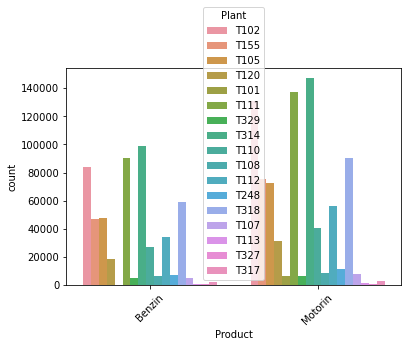

       Plant  Ratio-Plant
T314  246499       18.130
T111  227423       16.727
T102  214910       15.807
T318  149551       11.000
T155  122414        9.004
T105  119881        8.817
T112   90172        6.632
T110   67192        4.942
T120   49988        3.677
T248   18638        1.371
T108   14409        1.060
T107   12406        0.912
T329   11284        0.830
T101    6170        0.454
T317    4664        0.343
T113    2532        0.186
T327    1456        0.107
###################################################################################


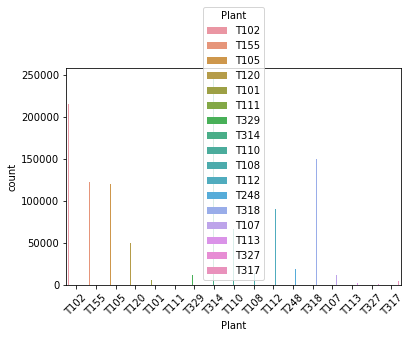

In [33]:
for col_name in cat_cols:
  cat_summary(df , col_name , plot = True)
# Talep %50 neredeyse Marmara bölgesinden kalan %50 de diğer bölgelerden

In [34]:
def num_summary(dataframe,num_col_name,plot=False,quan=False):
    quantiles=[0, 0.05, 0.10, 0.20, 0.30,  0.40, 0.50, 0.60, 0.70, 0.80, 0.90 , 1]
    if quan:
        print(dataframe[num_col_name].describe(quantiles).T)
    else:
        print(dataframe[num_col_name].describe().T)
    if plot:
        sns.histplot(data = dataframe,  x = col_name,kde = True)
        #dataframe[num_col_name].hist(bins=10)
        plt.xlabel(num_col_name)
        plt.title(num_col_name)
        plt.show(block=True)

count    1359589.000
mean    10583420.964
std       939413.857
min     10048261.000
0%      10048261.000
5%      10048928.000
10%     10049027.000
20%     10049240.000
30%     10049413.000
40%     10049568.000
50%     10049880.000
60%     10050078.000
70%     10054986.000
80%     11950417.000
90%     12292058.000
100%    12664221.000
max     12664221.000
Name: Customer, dtype: float64


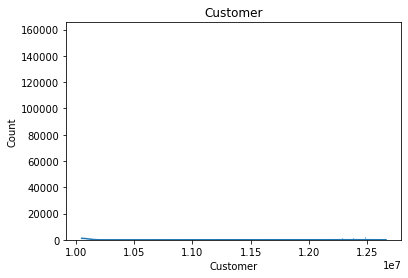

count   1359589.000
mean        698.344
std         232.471
min         116.000
0%          116.000
5%          218.000
10%         367.000
20%         466.000
30%         574.000
40%         676.000
50%         812.000
60%         835.000
70%         835.000
80%         884.000
90%         941.000
100%        990.000
max         990.000
Name: City Code, dtype: float64


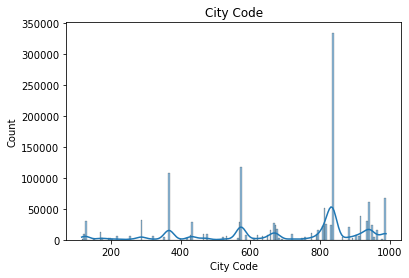

count   1359589.000
mean      14068.357
std       10951.052
min           0.000
0%            0.000
5%         1989.000
10%        3522.000
20%        4781.000
30%        5966.000
40%        9002.000
50%       11476.000
60%       14908.000
70%       18759.000
80%       22729.000
90%       27759.200
100%     273221.000
max      273221.000
Name: Litres, dtype: float64


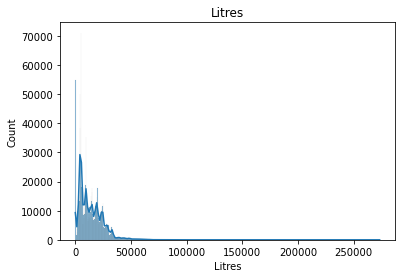

count   1359589.000
mean          4.763
std           0.820
min           3.220
0%            3.220
5%            3.640
10%           3.790
20%           4.030
30%           4.330
40%           4.450
50%           4.590
60%           4.790
70%           5.100
80%           5.400
90%           6.060
100%          7.180
max           7.180
Name: CRP, dtype: float64


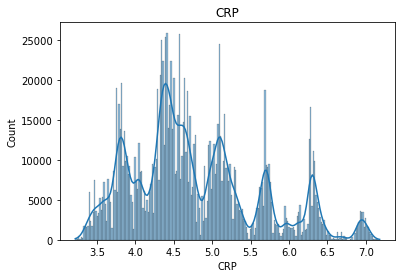

In [35]:
for col_name in num_cols:
    num_summary(df,col_name,plot=True,quan=True)

In [32]:
def high_correlated_cols(dataframe,plot=False,corr_th=0.90):
    corr=dataframe.corr()
    cor_matrix=corr.abs()
    upper_triangle_matrix=cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype("bool"))
    drop_list=[col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col]>corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={"figure.figsize":(15,15)})
        sns.heatmap(corr,cmap="RdBu",annot=True, fmt=".2f")
        plt.show()
    return drop_list

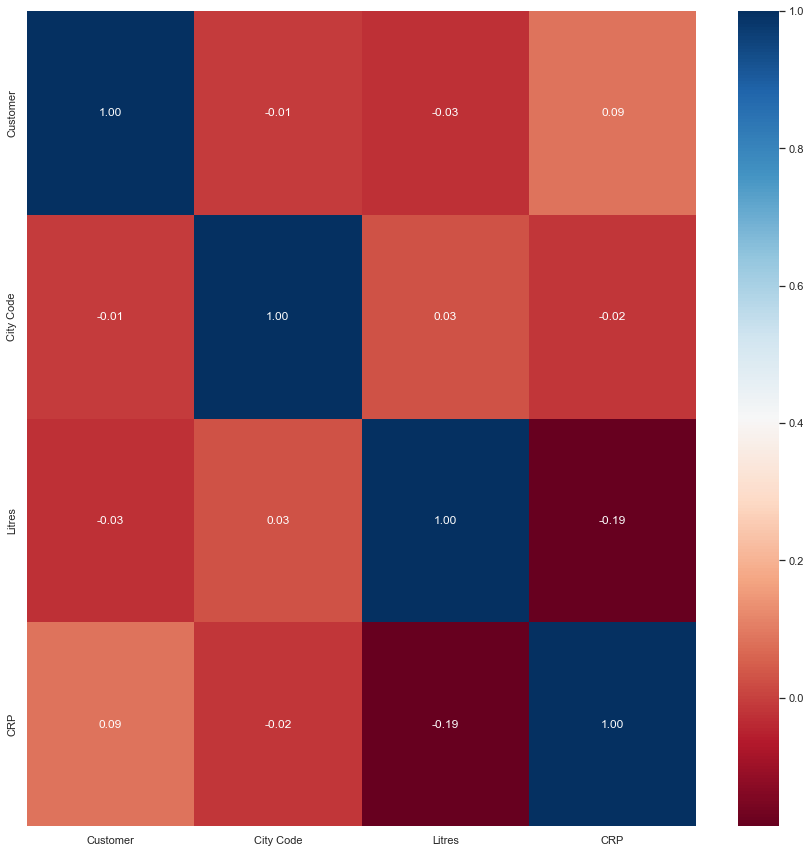

In [33]:
drop_list = high_correlated_cols(df , plot = True )

In [34]:
drop_list # high corelated variables # can delete that variables

[]

In [39]:
# Hedef Değişkenin Kategorik Değişkenler ile Analizi
def target_summary_with_cat(dataframe,target,categorical_col):
    print(categorical_col.upper())
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}).sort_values(by="TARGET_MEAN",ascending = False), end="\n\n\n")
    print("\n")

In [40]:
for col_name in cat_cols:
    target_summary_with_cat(df , "Litres" , col_name )

AREA
                           TARGET_MEAN
Area                                  
Marmara Bölgesi              15314.373
İç Anadolu Bölgesi           14190.375
Güneydoğu Anadolu Bölgesi    14161.214
Doğu Anadolu Bölgesi         13810.021
Ege Bölgesi                  13129.171
Karadeniz Bölgesi            12817.294
Akdeniz Bölgesi              11652.191




PRODUCT
         TARGET_MEAN
Product             
Motorin    18875.403
Benzin      6612.511




PLANT
       TARGET_MEAN
Plant             
T314     16302.249
T329     15386.783
T102     15212.974
T155     14686.081
T105     14440.897
T108     14241.829
T318     13318.132
T111     13141.729
T327     12797.408
T317     12426.022
T112     12387.039
T107     12075.487
T120     12066.660
T113     11852.400
T248     11687.860
T110     11232.791
T101       299.363






In [41]:
# Hedef Değişkenin Sayısal Değişkenler ile Analizi
def target_summary_with_num(dataframe, target, numerical_col):
    print(numerical_col.upper())
    print(dataframe.groupby(target).agg({numerical_col: ["mean","median"]}), end="\n\n\n")

In [42]:
for col_name in num_cols:
    target_summary_with_num(df, "Litres" , col_name )

CUSTOMER
               Customer             
                   mean       median
Litres                              
0.000      10591997.099 10049720.000
135.000    10049652.000 10049652.000
200.000    10050028.000 10050028.000
239.000    12499577.000 12499577.000
253.000    12292058.000 12292058.000
...                 ...          ...
171670.000 10049254.000 10049254.000
176943.000 10049365.000 10049365.000
188347.000 10049365.000 10049365.000
227877.000 10049943.000 10049943.000
273221.000 12267424.000 12267424.000

[58860 rows x 2 columns]


CITY CODE
           City Code        
                mean  median
Litres                      
0.000        663.676 676.000
135.000      367.000 367.000
200.000      574.000 574.000
239.000      367.000 367.000
253.000      570.000 570.000
...              ...     ...
171670.000   367.000 367.000
176943.000   575.000 575.000
188347.000   575.000 575.000
227877.000   172.000 172.000
273221.000   150.000 150.000

[58860 rows x 2 columns]


L

In [43]:
### train preprocessing

In [44]:
df.head()

,Customer,Area,City Code,date_of_price,Product,Plant,Litres,CRP
0,10048261,Karadeniz Bölgesi,883,2014-01-01,Benzin,T102,0.000,4.980
1,10048261,Karadeniz Bölgesi,883,2014-01-01,Benzin,T155,0.000,4.980
2,10049900,Karadeniz Bölgesi,883,2014-01-01,Benzin,T105,0.000,4.980
3,10048261,Karadeniz Bölgesi,883,2014-01-01,Motorin,T102,0.000,4.580
4,10048261,Karadeniz Bölgesi,883,2014-01-01,Motorin,T155,0.000,4.580


In [45]:
new_train = df.copy()

In [46]:
# date of transaction convert to datetime type
new_train["date_of_price"] = pd.to_datetime(new_train["date_of_price"])

In [47]:
# analysis date choose
import datetime
today = datetime.datetime(2019,12,31)

In [48]:
#new_train = new_train[new_train.Litres>0] 

In [49]:
# total price with amount and quantity
new_train["total_price"] = new_train["CRP"]*new_train["Litres"]

In [50]:
# Recency ve Monetary Values
data_x = new_train.groupby("Customer").agg({"total_price":lambda x: x.sum(),"date_of_price":lambda x: (today-x.max()).days})

# Data is based on stock so that, we make basketid unique
# data_y = new_train.groupby(["individualnumber","basketid"]).agg({"total_price":lambda x: x.sum()})

# basket id is unique and calculate frequency
data_z = new_train.groupby("Customer").agg({"total_price": lambda x: len(x)})

# RFM table 
rfm_table = pd.merge(data_x,data_z,on = "Customer")

# we rename column names
rfm_table.rename(columns = {"date_of_price":"Recency","total_price_y":"Frequency","total_price_x":"Monetary"}, inplace = True)

In [51]:
# RFM Scores

# frequency find
rfm_table = rfm_table.sort_values("Frequency", ascending = True)
rfm_table["freq_tile"] = pd.qcut(rfm_table["Frequency"],5,labels = False,duplicates='drop')


# recency find
rfm_table = rfm_table.sort_values("Frequency", ascending = True)
rfm_table["rec_tile"] = pd.qcut(rfm_table["Recency"],5,labels = False,duplicates='drop')

# monetary find 
rfm_table = rfm_table.sort_values("Frequency", ascending = True)
rfm_table["mone_tile"] = pd.qcut(rfm_table["Monetary"],5,labels = False,duplicates='drop')

# "Sıfır" değeri yer almasın istiyorsak, bulduğumuz değerleri bir arttırıyoruz
rfm_table["freq_tile"] = rfm_table["freq_tile"]+1
rfm_table["rec_tile"] = rfm_table["rec_tile"]+1
rfm_table["mone_tile"] = rfm_table["mone_tile"]+1

# bulduğumuz değerleri birleştirip tek bir skor elde ediyoruz.

rfm_table["rfm_score"]  = rfm_table["rec_tile"].map(str) + rfm_table["freq_tile"].map(str) + rfm_table["mone_tile"].map(str)
rfm_table.head()

,Monetary,Recency,Frequency,freq_tile,rec_tile,mone_tile,rfm_score
Customer,,,,,,,
11814051,0.000,1125,1,1,3,1,311
11798897,0.000,2120,1,1,3,1,311
11818298,0.000,2041,1,1,3,1,311
12073699,0.000,2041,1,1,3,1,311
11802697,0.000,2125,1,1,3,1,311


In [52]:
# değerlerin içeriklerini inceliyoruz 
rfm_table.groupby("rfm_score").agg({
'Recency':["mean","min","max","count"],
'Frequency':["mean","min","max","count"],
'Monetary':["mean","min","max","count"],
}).round(1).head()

Recency                 Frequency                     Monetary                                
             mean  min  max count      mean  min  max count         mean          min          max count
rfm_score                                                                                               
111       365.800  365  367    41   216.200    2  404    41 13269142.300   188109.300 22816693.200    41
112       365.900  365  367    18   357.600  260  417    18 28082271.200 23226713.400 36715425.600    18
114       365.000  365  365     1   372.000  372  372     1 71856172.300 71856172.300 71856172.300     1
121       365.600  365  367    13   586.200  431  801    13 19338022.800 12066128.900 22213718.700    13
122       365.800  365  367    85   653.200  419  817    85 34318724.200 23700231.000 44518574.400    85

In [53]:
rfm_table.groupby("rfm_score").size().sort_values(ascending=False)

rfm_score
155    187
311    152
144    119
133    102
122     85
134     55
143     53
222     47
154     46
145     46
111     41
123     34
132     33
322     27
211     22
233     19
112     18
121     13
321     12
332     11
323     10
223      9
212      7
221      7
312      7
333      7
142      7
153      6
334      6
244      6
344      5
243      5
234      5
232      5
355      5
135      3
245      2
343      2
345      2
254      1
255      1
114      1
224      1
124      1
125      1
131      1
354      1
dtype: int64

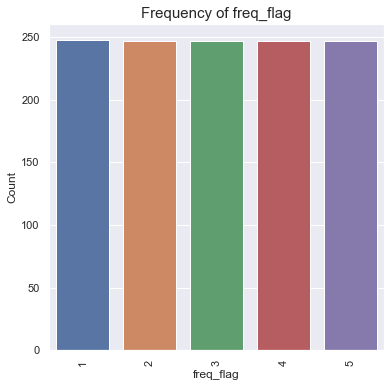

In [54]:
plt.figure(figsize = (6,6))
sns.countplot(x = "freq_tile", data = rfm_table)
plt.ylabel("Count",fontsize = 12)
plt.xlabel("freq_flag", fontsize= 12)
plt.xticks(rotation = "vertical")
plt.title("Frequency of freq_flag",fontsize = 15)
plt.show()

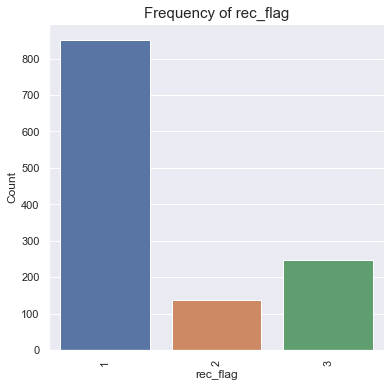

In [55]:
plt.figure(figsize = (6,6))
sns.countplot(x = "rec_tile", data = rfm_table)
plt.ylabel("Count",fontsize = 12)
plt.xlabel("rec_flag", fontsize= 12)
plt.xticks(rotation = "vertical")
plt.title("Frequency of rec_flag",fontsize = 15)
plt.show()

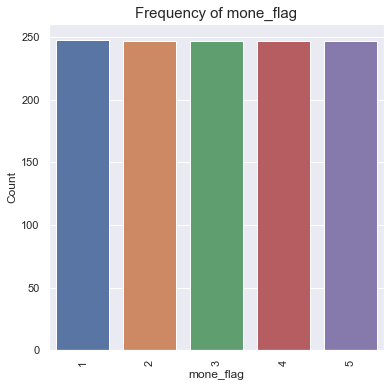

In [56]:
plt.figure(figsize = (6,6))
sns.countplot(x = "mone_tile", data = rfm_table)
plt.ylabel("Count",fontsize = 12)
plt.xlabel("mone_flag", fontsize= 12)
plt.xticks(rotation = "vertical")
plt.title("Frequency of mone_flag",fontsize = 15)
plt.show()

In [57]:
rfm_table.head()

,Monetary,Recency,Frequency,freq_tile,rec_tile,mone_tile,rfm_score
Customer,,,,,,,
11814051,0.000,1125,1,1,3,1,311
11798897,0.000,2120,1,1,3,1,311
11818298,0.000,2041,1,1,3,1,311
12073699,0.000,2041,1,1,3,1,311
11802697,0.000,2125,1,1,3,1,311


In [58]:
# target min inertia and max(1) silhoutte score

In [59]:
# k means
# Noktalar arası uzaklık toplamını minimize etmek ve Kümeler arası uzaklığı maksimize etmek

C:\Users\akdog\.conda\envs\spyder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


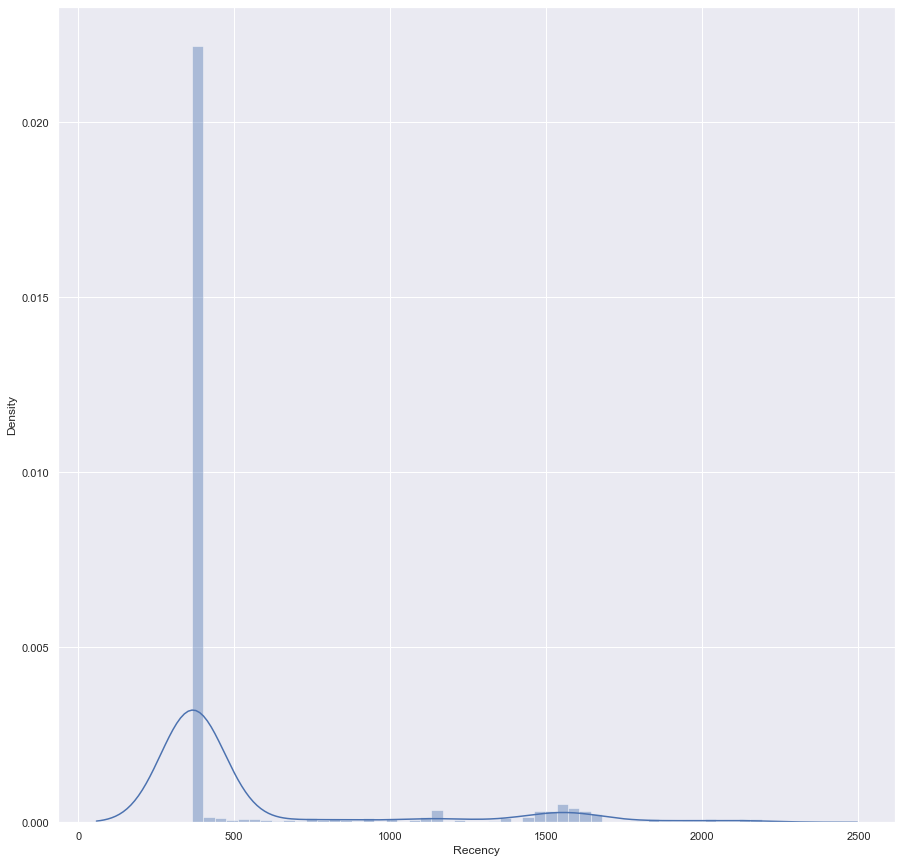

In [60]:
sns.distplot(rfm_table["Recency"])
plt.show()

C:\Users\akdog\.conda\envs\spyder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


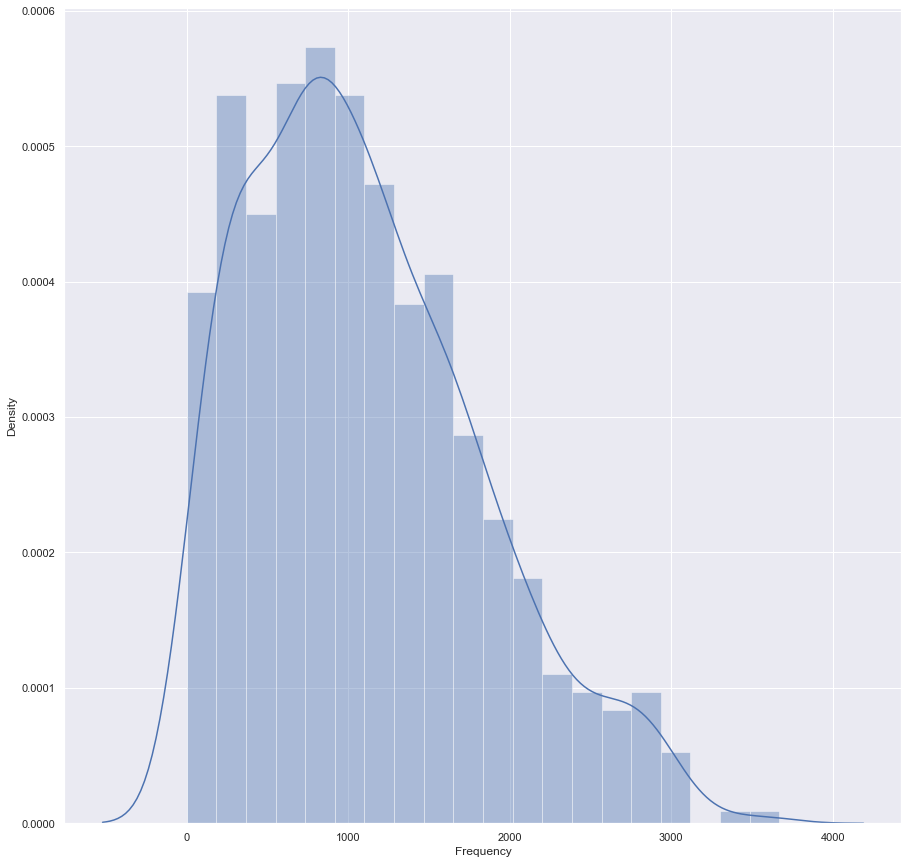

In [61]:
sns.distplot(rfm_table["Frequency"])
plt.show()

C:\Users\akdog\.conda\envs\spyder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


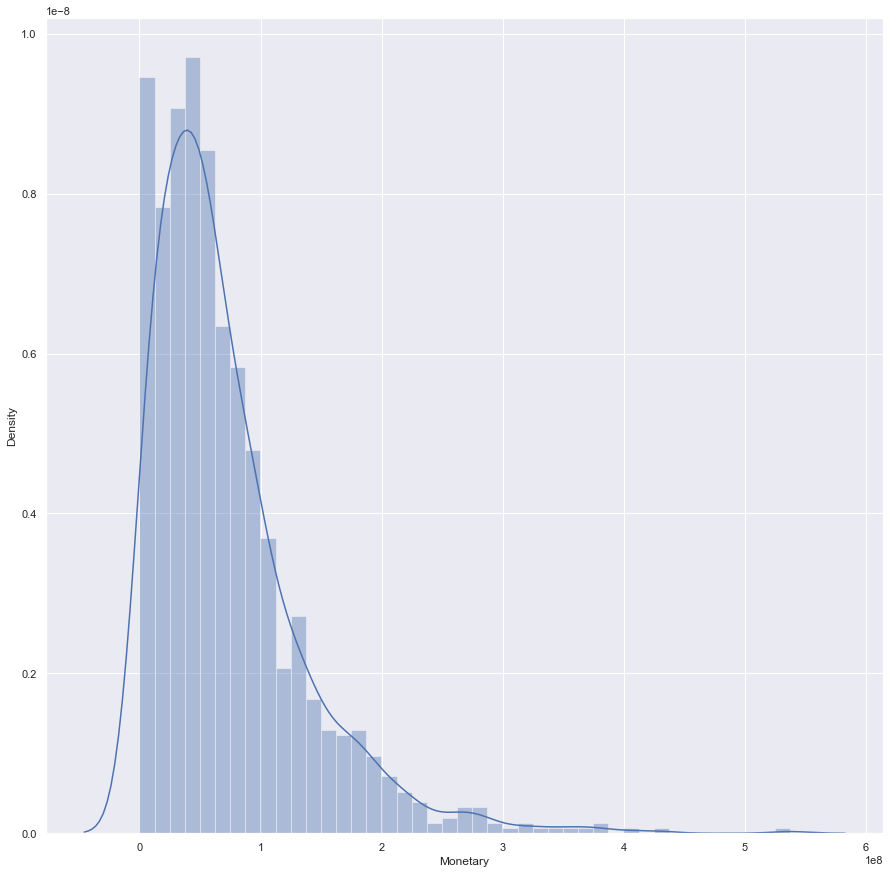

In [62]:
sns.distplot(rfm_table["Monetary"])
plt.show()

In [63]:
clus = rfm_table[["Monetary","Recency","Frequency"]]
clus.head()

,Monetary,Recency,Frequency
Customer,,,
11814051,0.000,1125,1
11798897,0.000,2120,1
11818298,0.000,2041,1
12073699,0.000,2041,1
11802697,0.000,2125,1


In [64]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(clus)
data_scaled2 = pd.DataFrame(x_scaled)

In [65]:
data_scaled2.head()

,0,1,2
0,0.000,0.416,0.000
1,0.000,0.962,0.000
2,0.000,0.918,0.000
3,0.000,0.918,0.000
4,0.000,0.964,0.000


In [66]:
data_scaled2.describe()

,0,1,2
count,1236.000,1236.000,1236.000
mean,0.134,0.100,0.300
std,0.118,0.232,0.197
min,0.000,0.000,0.000
25%,0.053,0.000,0.149
50%,0.104,0.000,0.269
75%,0.179,0.002,0.424
max,1.000,1.000,1.000


C:\Users\akdog\.conda\envs\spyder\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\akdog\.conda\envs\spyder\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\akdog\.conda\envs\spyder\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\akdog\.conda\envs\spyder\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is k

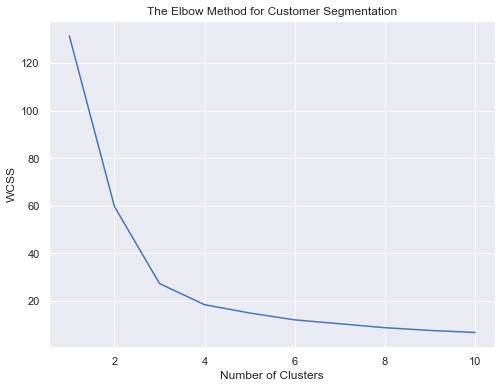

In [67]:
plt.figure(figsize = (8,6))
wcss = []
           
for i in range(1,11):
           kmeans = KMeans(n_clusters = i, init = "k-means++", n_init = 10, max_iter = 3000)
           kmeans.fit(data_scaled2)
           wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method for Customer Segmentation")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [68]:
# calculate silhoutte score if you want

In [69]:
#############

# k means using 4 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 4, init = "k-means++", n_init = 10, max_iter = 300)
kmeans.fit(data_scaled2)
pred = kmeans.predict(data_scaled2)

C:\Users\akdog\.conda\envs\spyder\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [70]:
kmeans.inertia_

18.447378501493098

In [71]:
d_frame = pd.DataFrame(clus)
d_frame["cluster"] = pred
d_frame["cluster"].value_counts()

0    501
2    417
1    173
3    145
Name: cluster, dtype: int64

In [72]:
d_frame.head()

,Monetary,Recency,Frequency,cluster
Customer,,,,
11814051,0.000,1125,1,1
11798897,0.000,2120,1,1
11818298,0.000,2041,1,1
12073699,0.000,2041,1,1
11802697,0.000,2125,1,1


In [73]:
d_frame.groupby("cluster").mean()

,Monetary,Recency,Frequency
cluster,,,
0,37513496.365,395.096,654.523
1,16867052.671,1547.503,318.728
2,91401685.878,375.436,1483.122
3,199962469.525,376.159,2469.455


In [95]:
# Aykırı değer eşik değerlerini belirleyelim
def outlier_thresholds(dataframe,col_name,q1=0.05,q3=0.95):
    quartile1=dataframe[col_name].quantile(q1)
    quartile3=dataframe[col_name].quantile(q3)
    interquartile=quartile3-quartile1
    low_limit=quartile1-1.5*interquartile
    up_limit=quartile3+1.5*interquartile
    return low_limit,up_limit

In [96]:
def check_outlier(dataframe,col_name,q1=0.05,q3=0.95):
    low_limit,up_limit=outlier_thresholds(dataframe,col_name,q1=q1,q3=q3)
    print(col_name.upper())
    if dataframe.loc[(dataframe[col_name]>up_limit) | (dataframe[col_name]<low_limit),:].any(axis=None):
        dataframe.loc[(dataframe[col_name]>up_limit)| (dataframe[col_name]<low_limit)].index
        return True
    else:
        return False

In [97]:
for col_name in num_cols:
    print(check_outlier(df,col_name,q1=0.05,q3=0.95))

CUSTOMER
False
CITY CODE
True
MONTH_X
False
LITRES
True
CRP
True
MONTH_Y
False


In [100]:
# aykırı değerlerin indexlerini çekelim ve gözlem birimlerine erişelim
def grab_outliers(dataframe,col_name,index=False,q1=0.05,q3=0.95):
    low,up=outlier_thresholds(dataframe,col_name,q1=q1,q3=q3)
    
    if dataframe[((dataframe[col_name]<low) | (dataframe[col_name]>up))].shape[0]>10:
        print(dataframe[((dataframe[col_name]<low) | (dataframe[col_name]>up))].head())
    else:
        print(dataframe[((dataframe[col_name]<low)| (dataframe[col_name]>up))])
    if index:
        outlier_index=dataframe[((dataframe[col_name]<low)|(dataframe[col_name]>up))].index
    return outlier_index

In [101]:
outlier_index=grab_outliers(df,"Litres",index=True,q1=0.05,q3=0.95)
len(outlier_index)

      Customer               Area  City Code date_of_price  Product  month_x  week_x  year_x  season_x     Litres   CRP  month_y  week_y  year_y  season_y
1658  10049631  Karadeniz Bölgesi        966    2016-07-04  Motorin        7      27    2016         3 138204.000 3.850        7      27    2016         3
1762  10049631  Karadeniz Bölgesi        966    2016-09-05  Motorin        9      36    2016         3 144995.000 3.810        9      36    2016         3
2157  10049998  Karadeniz Bölgesi        966    2017-09-04  Motorin        9      36    2017         3 140561.000 4.520        9      36    2017         3
2477  10049998  Karadeniz Bölgesi        966    2018-06-12  Motorin        6      24    2018         2 127769.000 5.720        6      24    2018         2
2551  10049998  Karadeniz Bölgesi        966    2018-08-13  Motorin        8      33    2018         3 129955.000 5.720        8      33    2018         3


22612

<AxesSubplot:xlabel='Litres'>

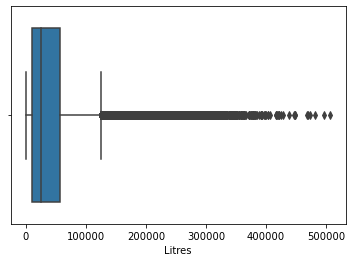

In [102]:
sns.boxplot(x=df["Litres"])

In [103]:
def replace_with_thresholds(dataframe,col_name,q1=0.05,q3=0.95):
    low_limit,up_limit=outlier_thresholds(dataframe,col_name,q1=q1,q3=q3)
    dataframe.loc[(dataframe[col_name]<low_limit),col_name]=low_limit
    dataframe.loc[(dataframe[col_name]>up_limit),col_name]=up_limit

In [104]:
replace_with_thresholds(df,"Litres")
replace_with_thresholds(df,"CRP")

<AxesSubplot:xlabel='Litres'>

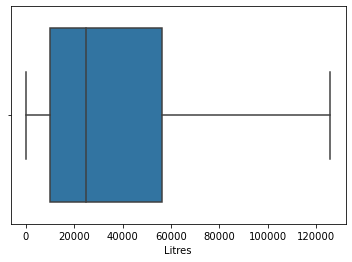

In [105]:
sns.boxplot(x=df["Litres"])

In [43]:
df = pd.concat([df_test.assign(ind="test"), df.assign(ind="train")])

In [44]:
# new features

In [35]:
df["date_of_price"] = pd.to_datetime(df["date_of_price"])
df["month"] = df.date_of_price.dt.month
df["week"] = df.date_of_price.dt.isocalendar().week
df["year"] = df.date_of_price.dt.year

In [76]:
df_customer_product = new_df.groupby(["Customer","Product"])[["Area"]].count().reset_index()

In [77]:
df_customer_product["area_percent_customer_product"] = ((new_df.groupby(["Customer","Product"])[["Area"]].count().reset_index()[["Area"]])/(new_df.groupby(["Customer","Product"])[["Area"]].count().reset_index()[["Area"]].sum()))*(100)

In [56]:
#df.groupby(["Customer","season_y","Product"])[["Area"]].count().reset_index().head(50)

,Customer,season_y,Product,Area
0,10048261,1,Benzin,74
1,10048261,1,Motorin,76
2,10048261,2,Benzin,78
3,10048261,2,Motorin,77
4,10048261,3,Benzin,78
5,10048261,3,Motorin,78
6,10048261,4,Benzin,78
7,10048261,4,Motorin,77
8,10048263,1,Benzin,44
9,10048263,1,Motorin,65


In [79]:
new_df = new_df.merge(df_customer_product,on=["Customer","Product"])

In [82]:
new_df.columns

Index(['index', 'Customer', 'Area_x', 'City Code', 'Product', 'Billing Date', 'CRP', 'Week_Number', 'Plant', 'Sehir', 'Nüfus', 'Taşıt Sayısı', 'Taşıt Sayısının Nüfusa Oranı', 'ind', 'Litres', 'km_fuel', 'month', 'year', 'Area_y', 'area_percent_customer_product'], dtype='object')

In [18]:
new_df.drop(["month_y","week_y","year_y","season_y"],axis=1,inplace=True)

In [84]:
new_df.columns =['index', 'Customer', 'Area', 'City Code', 'Product', 'Billing Date', 'CRP', 'Week_Number', 'Plant', 'Sehir', 'Nüfus', 'Taşıt Sayısı', 'Taşıt Sayısının Nüfusa Oranı', 'ind', 'Litres', 'km_fuel', 'month', 'year', 'Frequency', 'Frequency_Percent']

In [59]:
# feature load

In [23]:
passengers_14 = (276073/1851357) 
passengers_15 = (290734/1851357) 
passengers_16 = (300852/1851357) 
passengers_17 = (314734/1851357) 
passengers_18 = (329363/1851357) 
passengers_19 = (339601/1851357) 


w_14 = (234492/1528780)
w_15 = (244329/1528780)
w_16 = (253139/1528780)
w_17 = (262739/1528780)
w_18 = (266502/1528780)
w_19 = (267579/1528780)

In [24]:
def km_statistics(dataframe):
    benzin = dataframe.iloc[[3,10],[3]].sum()
    motorin = dataframe.iloc[[4,5,6,7,8,9],[3]].sum()
    total = dataframe.iloc[[1],[3]]
    benzin_to_total = benzin/total
    motorin_to_total = motorin/total
    return benzin_to_total,motorin_to_total

In [25]:
km_15 = pd.read_excel("15-kilometre istatistikleri (3).xls")
km_16 = pd.read_excel("16_tasit-kilometre istatistikleri (2).xls")
km_17 = pd.read_excel("17-kilometre istatistikleri (1).xls")
km_18_19 = pd.read_excel("18-19_tasit-kilometre istatistikleri.xls")

In [26]:
bk_17 = km_17.iloc[[2,9],[3]].sum()/km_17.iloc[[0],[3]]
mk_17 = km_17.iloc[[3,4,5,6,7,8],[3]].sum()/km_17.iloc[[0],[3]]

In [27]:
bk_15,mk_15 = km_statistics(km_15)
bk_16,mk_16 = km_statistics(km_16)

In [28]:
bk_18 = km_18_19.iloc[[3,10],[3]].sum()/km_18_19.iloc[[1],[3]]
mk_18 = km_18_19.iloc[[4,5,6,7,8,9],[3]].sum()/km_18_19.iloc[[1],[3]]
bk_19 = km_18_19.iloc[[3,10],[6]].sum()/km_18_19.iloc[[1],[6]]
mk_19 = km_18_19.iloc[[4,5,6,7,8,9],[6]].sum()/km_18_19.iloc[[1],[6]]

In [29]:
def km_statistics_per(dataframe):
    benzin = dataframe.iloc[[3,10],[2]].sum()
    motorin = dataframe.iloc[[4,5,6,7,8,9],[3]].sum()
    total = dataframe.iloc[[1],[3]]
    benzin_to_total = benzin/total
    motorin_to_total = motorin/total
    return benzin_to_total,motorin_to_total

In [30]:
def vehicle_type(dataframe):
    vt_14 = dataframe.iloc[[0],[1,2,3,4,5,6,7,8,10]]
    vt_15 = dataframe.iloc[[1],[1,2,3,4,5,6,7,8,10]]
    vt_16 = dataframe.iloc[[2],[1,2,3,4,5,6,7,8,10]]
    vt_17 = dataframe.iloc[[3],[1,2,3,4,5,6,7,8,10]]
    vt_18 = dataframe.iloc[[4],[1,2,3,4,5,6,7,8,10]]
    vt_19 = dataframe.iloc[[5],[1,2,3,4,5,6,7,8,10]]
    return vt_14,vt_15,vt_16,vt_17,vt_18,vt_19

In [31]:
vt = pd.read_excel("kara tasit sayisi_tür.xls")
vt_14,vt_15,vt_16,vt_17,vt_18,vt_19 = vehicle_type(vt)  

In [32]:
def engine_volume(dataframe):
    en_14 = dataframe.iloc[[2,3,4,5,6,7,8],[0,1]]
    en_15 = dataframe.iloc[[2,3,4,5,6,7,8],[0,3]]
    en_16 = dataframe.iloc[[2,3,4,5,6,7,8],[0,5]]
    en_17 = dataframe.iloc[[2,3,4,5,6,7,8],[0,7]]
    en_18 = dataframe.iloc[[2,3,4,5,6,7,8],[0,9]]
    en_19 = dataframe.iloc[[2,3,4,5,6,7,8],[0,11]]
    return en_14,en_15,en_16,en_17,en_18,en_19

In [33]:
engine_volumes = pd.read_excel("motor silindir hacimlerine gore dagilimi (1).xls")
en_14,en_15,en_16,en_17,en_18,en_19 = engine_volume(engine_volumes)

In [34]:
def fuel_vehicle(dataframe):
    fuel_14 = dataframe.iloc[[0],[0,1,2,4,6]]
    fuel_15 = dataframe.iloc[[1],[0,1,2,4,6]]
    fuel_16 = dataframe.iloc[[2],[0,1,2,4,6]]
    fuel_17 = dataframe.iloc[[3],[0,1,2,4,6]]
    fuel_18 = dataframe.iloc[[4],[0,1,2,4,6]]
    fuel_19 = dataframe.iloc[[5],[0,1,2,4,6]]
    return fuel_14,fuel_15,fuel_16,fuel_17,fuel_18,fuel_19

In [35]:
fuel__type_vehicle = pd.read_excel("otomobillerin yakit cinsine gore dagilimi.xls")
fuel_14,fuel_15,fuel_16,fuel_17,fuel_18,fuel_19 = fuel_vehicle(fuel__type_vehicle)

In [36]:
new_df = pd.concat([member_test.assign(ind="test"), member.assign(ind="train")])

In [54]:
new_df["year"] = new_df["Billing Date"].dt.year

In [92]:
new_df.loc[(new_df.year==2015)&(new_df.Product=="Benzin"),"km_fuel"] = new_df.loc[(new_df.year==2015)&(new_df.Product=="Benzin"),"Taşıt Sayısı"]**new_df.loc[(new_df.year==2015)&(new_df.Product=="Benzin"),"Frequency_Percent"]
new_df.loc[(new_df.year==2016)&(new_df.Product=="Benzin"),"km_fuel"] = new_df.loc[(new_df.year==2016)&(new_df.Product=="Benzin"),"Taşıt Sayısı"]*new_df.loc[(new_df.year==2016)&(new_df.Product=="Benzin"),"Frequency_Percent"]
new_df.loc[(new_df.year==2017)&(new_df.Product=="Benzin"),"km_fuel"] = new_df.loc[(new_df.year==2017)&(new_df.Product=="Benzin"),"Taşıt Sayısı"]*new_df.loc[(new_df.year==2017)&(new_df.Product=="Benzin"),"Frequency_Percent"]
new_df.loc[(new_df.year==2018)&(new_df.Product=="Benzin"),"km_fuel"] = new_df.loc[(new_df.year==2018)&(new_df.Product=="Benzin"),"Taşıt Sayısı"]*new_df.loc[(new_df.year==2018)&(new_df.Product=="Benzin"),"Frequency_Percent"]
new_df.loc[(new_df.year==2019)&(new_df.Product=="Benzin"),"km_fuel"] = new_df.loc[(new_df.year==2019)&(new_df.Product=="Benzin"),"Taşıt Sayısı"]*new_df.loc[(new_df.year==2019)&(new_df.Product=="Benzin"),"Frequency_Percent"]
new_df.loc[(new_df.year==2014)&(new_df.Product=="Benzin"),"km_fuel"] = new_df.loc[(new_df.year==2014)&(new_df.Product=="Benzin"),"Taşıt Sayısı"]*new_df.loc[(new_df.year==2014)&(new_df.Product=="Benzin"),"Frequency_Percent"]
new_df.loc[(new_df.year==2014)&(new_df.Product=="Motorin"),"km_fuel"] = new_df.loc[(new_df.year==2014)&(new_df.Product=="Motorin"),"Taşıt Sayısı"]*new_df.loc[(new_df.year==2014)&(new_df.Product=="Benzin"),"Frequency_Percent"]
new_df.loc[(new_df.year==2015)&(new_df.Product=="Motorin"),"km_fuel"] = new_df.loc[(new_df.year==2015)&(new_df.Product=="Motorin"),"Taşıt Sayısı"]*new_df.loc[(new_df.year==2015)&(new_df.Product=="Benzin"),"Frequency_Percent"]
new_df.loc[(new_df.year==2016)&(new_df.Product=="Motorin"),"km_fuel"] = new_df.loc[(new_df.year==2016)&(new_df.Product=="Motorin"),"Taşıt Sayısı"]*new_df.loc[(new_df.year==2016)&(new_df.Product=="Benzin"),"Frequency_Percent"]
new_df.loc[(new_df.year==2017)&(new_df.Product=="Motorin"),"km_fuel"] = new_df.loc[(new_df.year==2017)&(new_df.Product=="Motorin"),"Taşıt Sayısı"]*new_df.loc[(new_df.year==2017)&(new_df.Product=="Benzin"),"Frequency_Percent"]
new_df.loc[(new_df.year==2018)&(new_df.Product=="Motorin"),"km_fuel"] = new_df.loc[(new_df.year==2018)&(new_df.Product=="Motorin"),"Taşıt Sayısı"]*new_df.loc[(new_df.year==2018)&(new_df.Product=="Benzin"),"Frequency_Percent"]
new_df.loc[(new_df.year==2019)&(new_df.Product=="Motorin"),"km_fuel"] = new_df.loc[(new_df.year==2019)&(new_df.Product=="Motorin"),"Taşıt Sayısı"]*new_df.loc[(new_df.year==2019)&(new_df.Product=="Benzin"),"Frequency_Percent"]

In [72]:
new_df.loc[(new_df.year==2015)&(new_df.Product=="Benzin"),"km_fuel"] = new_df.loc[(new_df.year==2015)&(new_df.Product=="Benzin"),"Taşıt Sayısının Nüfusa Oranı"]*bk_15.iloc[0,0]*0.1602
new_df.loc[(new_df.year==2016)&(new_df.Product=="Benzin"),"km_fuel"] = new_df.loc[(new_df.year==2016)&(new_df.Product=="Benzin"),"Taşıt Sayısının Nüfusa Oranı"]*bk_16.iloc[0,0]*0.1610
new_df.loc[(new_df.year==2017)&(new_df.Product=="Benzin"),"km_fuel"] = new_df.loc[(new_df.year==2017)&(new_df.Product=="Benzin"),"Taşıt Sayısının Nüfusa Oranı"]*bk_17.iloc[0,0]*0.1520
new_df.loc[(new_df.year==2018)&(new_df.Product=="Benzin"),"km_fuel"] = new_df.loc[(new_df.year==2018)&(new_df.Product=="Benzin"),"Taşıt Sayısının Nüfusa Oranı"]*bk_18.values[0,0]*0.1599
new_df.loc[(new_df.year==2019)&(new_df.Product=="Benzin"),"km_fuel"] = new_df.loc[(new_df.year==2019)&(new_df.Product=="Benzin"),"Taşıt Sayısının Nüfusa Oranı"]*bk_19.values[0,0]*0.1611
new_df.loc[(new_df.year==2014)&(new_df.Product=="Benzin"),"km_fuel"] = new_df.loc[(new_df.year==2014)&(new_df.Product=="Benzin"),"Taşıt Sayısının Nüfusa Oranı"]*new_df.km_fuel.mean()*0.1737


new_df.loc[(new_df.year==2014)&(new_df.Product=="Motorin"),"km_fuel"] = new_df.loc[(new_df.year==2014)&(new_df.Product=="Motorin"),"Taşıt Sayısının Nüfusa Oranı"]*new_df.km_fuel.mean()*0.173
new_df.loc[(new_df.year==2015)&(new_df.Product=="Motorin"),"km_fuel"] = new_df.loc[(new_df.year==2015)&(new_df.Product=="Motorin"),"Taşıt Sayısının Nüfusa Oranı"]*mk_15.iloc[0,0]*0.1602
new_df.loc[(new_df.year==2016)&(new_df.Product=="Motorin"),"km_fuel"] = new_df.loc[(new_df.year==2016)&(new_df.Product=="Motorin"),"Taşıt Sayısının Nüfusa Oranı"]*mk_16.iloc[0,0]*0.1610
new_df.loc[(new_df.year==2017)&(new_df.Product=="Motorin"),"km_fuel"] = new_df.loc[(new_df.year==2017)&(new_df.Product=="Motorin"),"Taşıt Sayısının Nüfusa Oranı"]*mk_17.iloc[0,0]*0.1520
new_df.loc[(new_df.year==2018)&(new_df.Product=="Motorin"),"km_fuel"] = new_df.loc[(new_df.year==2018)&(new_df.Product=="Motorin"),"Taşıt Sayısının Nüfusa Oranı"]*mk_18.values[0,0]*0.1599
new_df.loc[(new_df.year==2019)&(new_df.Product=="Motorin"),"km_fuel"] = new_df.loc[(new_df.year==2019)&(new_df.Product=="Motorin"),"Taşıt Sayısının Nüfusa Oranı"]*mk_19.values[0,0]*0.1611

In [85]:
new_df.loc[(new_df.year==2015)&(new_df.Product=="Benzin"),"km_fuel"] = new_df.loc[(new_df.year==2015)&(new_df.Product=="Benzin"),"Frequency_Percent"]*bk_15.iloc[0,0]*0.1602
new_df.loc[(new_df.year==2016)&(new_df.Product=="Benzin"),"km_fuel"] = new_df.loc[(new_df.year==2016)&(new_df.Product=="Benzin"),"Frequency_Percent"]*bk_16.iloc[0,0]*0.1610
new_df.loc[(new_df.year==2017)&(new_df.Product=="Benzin"),"km_fuel"] = new_df.loc[(new_df.year==2017)&(new_df.Product=="Benzin"),"Frequency_Percent"]*bk_17.iloc[0,0]*0.1520
new_df.loc[(new_df.year==2018)&(new_df.Product=="Benzin"),"km_fuel"] = new_df.loc[(new_df.year==2018)&(new_df.Product=="Benzin"),"Frequency_Percent"]*bk_18.values[0,0]*0.1599
new_df.loc[(new_df.year==2019)&(new_df.Product=="Benzin"),"km_fuel"] = new_df.loc[(new_df.year==2019)&(new_df.Product=="Benzin"),"Frequency_Percent"]*bk_19.values[0,0]*0.1611
new_df.loc[(new_df.year==2014)&(new_df.Product=="Benzin"),"km_fuel"] = new_df.loc[(new_df.year==2014)&(new_df.Product=="Benzin"),"Frequency_Percent"]*new_df.km_fuel.mean()*0.1737


new_df.loc[(new_df.year==2015)&(new_df.Product=="Motorin"),"km_fuel"] = new_df.loc[(new_df.year==2015)&(new_aadf.Product=="Motorin"),"Frequency_Percent"]*mk_15.iloc[0,0]*0.1602
new_df.loc[(new_df.year==2016)&(new_df.Product=="Motorin"),"km_fuel"] = new_df.loc[(new_df.year==2016)&(new_df.Product=="Motorin"),"Frequency_Percent"]*mk_16.iloc[0,0]*0.1610
new_df.loc[(new_df.year==2017)&(new_df.Product=="Motorin"),"km_fuel"] = new_df.loc[(new_df.year==2017)&(new_df.Product=="Motorin"),"Frequency_Percent"]*mk_17.iloc[0,0]*0.1520
new_df.loc[(new_df.year==2018)&(new_df.Product=="Motorin"),"km_fuel"] = new_df.loc[(new_df.year==2018)&(new_df.Product=="Motorin"),"Frequency_Percent"]*mk_18.values[0,0]*0.1599
new_df.loc[(new_df.year==2019)&(new_df.Product=="Motorin"),"km_fuel"] = new_df.loc[(new_df.year==2019)&(new_df.Product=="Motorin"),"Frequency_Percent"]*mk_19.values[0,0]*0.1611
new_df.loc[(new_df.year==2014)&(new_df.Product=="Motorin"),"km_fuel"] = new_df.loc[(new_df.year==2014)&(new_df.Product=="Motorin"),"Frequency_Percent"]*new_df.km_fuel.mean()*0.1737

In [61]:
def high_correlated_cols(dataframe,plot=False,corr_th=0.90):
    corr=dataframe.corr()
    cor_matrix=corr.abs()
    upper_triangle_matrix=cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype("bool"))
    drop_list=[col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col]>corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={"figure.figsize":(15,15)})
        sns.heatmap(corr,cmap="RdBu",annot=True, fmt=".2f")
        plt.show()
    return drop_list

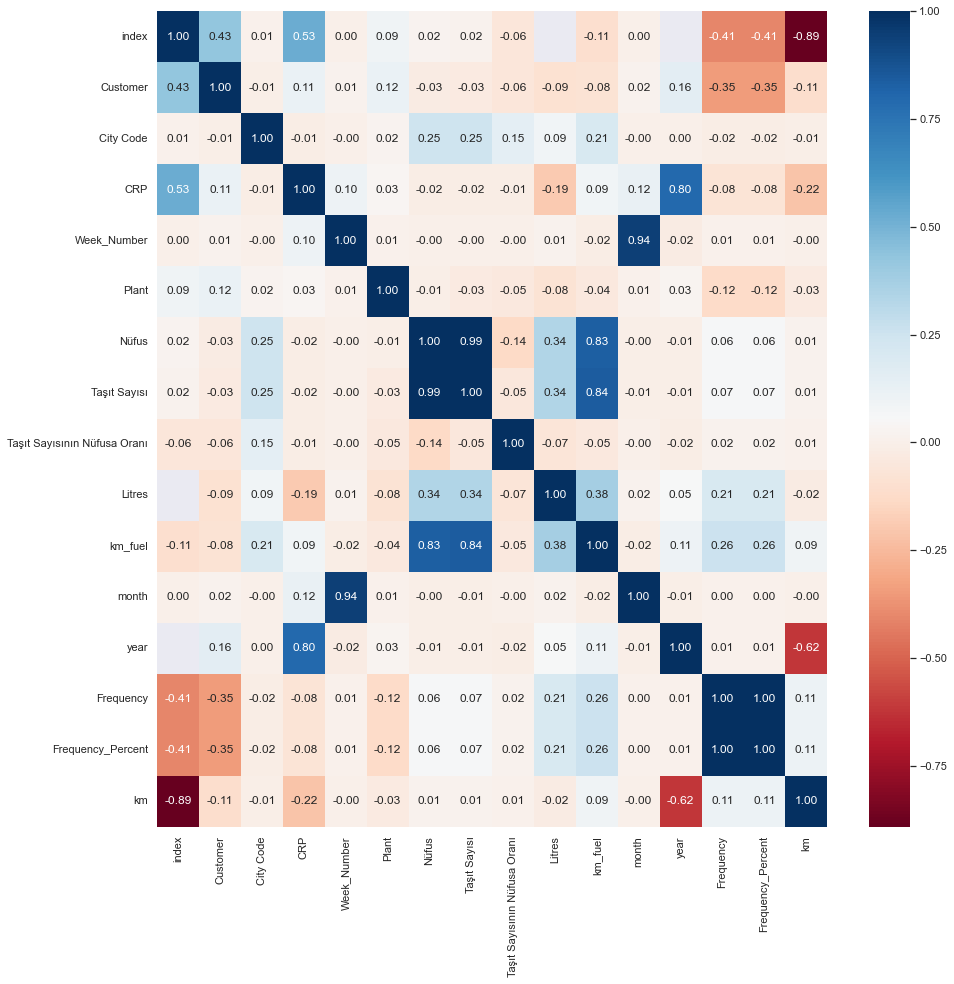

In [93]:
drop_list = high_correlated_cols(new_df , plot = True )

In [64]:
135490.000/771932.000

0.17552064171455517

In [57]:
t_14=0.1737
t_15=0.1602
t_16=0.1610
t_17=0.1520
t_18=0.1599
t_19=0.1611

In [ ]:
new_df["passenger"] = 1
new_df.loc[new_df.year==2014,"passenger"] = new_df.loc[new_df.year==2014,"Frequency_Percent"]*passengers_14
new_df.loc[new_df.year==2015,"passenger"] = new_df.loc[new_df.year==2015,"Frequency_Percent"]*passengers_15 
new_df.loc[new_df.year==2016,"passenger"] = new_df.loc[new_df.year==2016,"Frequency_Percent"]*passengers_16 
new_df.loc[new_df.year==2017,"passenger"] = new_df.loc[new_df.year==2017,"Frequency_Percent"]*passengers_17 
new_df.loc[new_df.year==2018,"passenger"] = new_df.loc[new_df.year==2018,"Frequency_Percent"]*passengers_18 
new_df.loc[new_df.year==2019,"passenger"] = new_df.loc[new_df.year==2019,"Frequency_Percent"]*passengers_19

new_df["w"] = 1
new_df.loc[new_df.year==2014,"w"] = new_df.loc[new_df.year==2014,"Frequency_Percent"]*w_14
new_df.loc[new_df.year==2015,"w"] = new_df.loc[new_df.year==2015,"Frequency_Percent"]*w_15
new_df.loc[new_df.year==2016,"w"] = new_df.loc[new_df.year==2016,"Frequency_Percent"]*w_16 
new_df.loc[new_df.year==2017,"w"] = new_df.loc[new_df.year==2017,"Frequency_Percent"]*w_17 
new_df.loc[new_df.year==2018,"w"] = new_df.loc[new_df.year==2018,"Frequency_Percent"]*w_18 
new_df.loc[new_df.year==2019,"w"] = new_df.loc[new_df.year==2019,"Frequency_Percent"]*w_19

In [69]:
new_df["car_number"] = 0
new_df.loc[new_df.year==2014,"car_number"] = new_df.loc[new_df.year==2014,"Oran"]* (vt_14.iloc[0,[1]][0]*t_14)
new_df.loc[new_df.year==2015,"car_number"] = new_df.loc[new_df.year==2015,"Oran"]* (vt_15.iloc[0,[1]][0]*t_15)
new_df.loc[new_df.year==2016,"car_number"] = new_df.loc[new_df.year==2016,"Oran"]* (vt_16.iloc[0,[1]][0]*t_16)
new_df.loc[new_df.year==2017,"car_number"] = new_df.loc[new_df.year==2017,"Oran"]* (vt_17.iloc[0,[1]][0]*t_17)
new_df.loc[new_df.year==2018,"car_number"] = new_df.loc[new_df.year==2018,"Oran"]* (vt_18.iloc[0,[1]][0]*t_18)
new_df.loc[new_df.year==2019,"car_number"] = new_df.loc[new_df.year==2019,"Oran"]* (vt_19.iloc[0,[1]][0]*t_19)

In [70]:
new_df["car_number"] = 0
new_df.loc[new_df.year==2014,"car_number"] = new_df.loc[new_df.year==2014,"Oran"]* (vt_14.iloc[0,[1]][0]*t_14)
new_df.loc[new_df.year==2015,"car_number"] = new_df.loc[new_df.year==2015,"Oran"]* (vt_15.iloc[0,[1]][0]*t_15)
new_df.loc[new_df.year==2016,"car_number"] = new_df.loc[new_df.year==2016,"Oran"]* (vt_16.iloc[0,[1]][0]*t_16)
new_df.loc[new_df.year==2017,"car_number"] = new_df.loc[new_df.year==2017,"Oran"]* (vt_17.iloc[0,[1]][0]*t_17)
new_df.loc[new_df.year==2018,"car_number"] = new_df.loc[new_df.year==2018,"Oran"]* (vt_18.iloc[0,[1]][0]*t_18)
new_df.loc[new_df.year==2019,"car_number"] = new_df.loc[new_df.year==2019,"Oran"]* (vt_19.iloc[0,[1]][0]*t_19)

In [71]:
new_df["minibus_number"] = 0
new_df.loc[new_df.year==2014,"minibus_number"] = new_df.loc[new_df.year==2014,"Oran"]* (vt_14.iloc[0,[2]][0]*t_14)   
new_df.loc[new_df.year==2015,"minibus_number"] = new_df.loc[new_df.year==2015,"Oran"]* (vt_15.iloc[0,[2]][0]*t_15)
new_df.loc[new_df.year==2016,"minibus_number"] = new_df.loc[new_df.year==2016,"Oran"]* (vt_16.iloc[0,[2]][0]*t_16)
new_df.loc[new_df.year==2017,"minibus_number"] = new_df.loc[new_df.year==2017,"Oran"]* (vt_17.iloc[0,[2]][0]*t_17)
new_df.loc[new_df.year==2018,"minibus_number"] = new_df.loc[new_df.year==2018,"Oran"]* (vt_18.iloc[0,[2]][0]*t_18)
new_df.loc[new_df.year==2019,"minibus_number"] = new_df.loc[new_df.year==2019,"Oran"]* (vt_19.iloc[0,[2]][0]*t_19)

In [72]:
new_df["bus_number"] = 0
new_df.loc[new_df.year==2014,"bus_number"] = new_df.loc[new_df.year==2014,"Oran"]* (vt_14.iloc[0,[3]][0]*t_14)
new_df.loc[new_df.year==2015,"bus_number"] = new_df.loc[new_df.year==2015,"Oran"]* (vt_15.iloc[0,[3]][0]*t_15)
new_df.loc[new_df.year==2016,"bus_number"] = new_df.loc[new_df.year==2016,"Oran"]* (vt_16.iloc[0,[3]][0]*t_16)
new_df.loc[new_df.year==2017,"bus_number"] = new_df.loc[new_df.year==2017,"Oran"]* (vt_17.iloc[0,[3]][0]*t_17)
new_df.loc[new_df.year==2018,"bus_number"] = new_df.loc[new_df.year==2018,"Oran"]* (vt_18.iloc[0,[3]][0]*t_18)
new_df.loc[new_df.year==2019,"bus_number"] = new_df.loc[new_df.year==2019,"Oran"]* (vt_19.iloc[0,[3]][0]*t_19)

In [73]:
new_df["truck_number"] = 0
new_df.loc[new_df.year==2014,"truck_number"] = new_df.loc[new_df.year==2014,"Oran"]* (vt_14.iloc[0,[4]][0]*t_14)
new_df.loc[new_df.year==2015,"truck_number"] = new_df.loc[new_df.year==2015,"Oran"]* (vt_15.iloc[0,[4]][0]*t_15)
new_df.loc[new_df.year==2016,"truck_number"] = new_df.loc[new_df.year==2016,"Oran"]* (vt_16.iloc[0,[4]][0]*t_16)
new_df.loc[new_df.year==2017,"truck_number"] = new_df.loc[new_df.year==2017,"Oran"]* (vt_17.iloc[0,[4]][0]*t_17)
new_df.loc[new_df.year==2018,"truck_number"] = new_df.loc[new_df.year==2018,"Oran"]* (vt_18.iloc[0,[4]][0]*t_18)
new_df.loc[new_df.year==2019,"truck_number"] = new_df.loc[new_df.year==2019,"Oran"]* (vt_19.iloc[0,[4]][0]*t_19)

In [74]:
new_df["truck_big_number"] = 0
new_df.loc[new_df.year==2014,"truck_big_number"] = new_df.loc[new_df.year==2014,"Oran"]* (vt_14.iloc[0,[5]][0]*t_14)
new_df.loc[new_df.year==2015,"truck_big_number"] = new_df.loc[new_df.year==2015,"Oran"]* (vt_15.iloc[0,[5]][0]*t_15)
new_df.loc[new_df.year==2016,"truck_big_number"] = new_df.loc[new_df.year==2016,"Oran"]* (vt_16.iloc[0,[5]][0]*t_16)
new_df.loc[new_df.year==2017,"truck_big_number"] = new_df.loc[new_df.year==2017,"Oran"]* (vt_17.iloc[0,[5]][0]*t_17)
new_df.loc[new_df.year==2018,"truck_big_number"] = new_df.loc[new_df.year==2018,"Oran"]* (vt_18.iloc[0,[5]][0]*t_18)
new_df.loc[new_df.year==2019,"truck_big_number"] = new_df.loc[new_df.year==2019,"Oran"]* (vt_19.iloc[0,[5]][0]*t_19)

In [75]:
new_df["motorcycle_number"] = 0
new_df.loc[new_df.year==2014,"motorcycle_number"] = new_df.loc[new_df.year==2014,"Oran"]* (vt_14.iloc[0,[6]][0]*t_14)
new_df.loc[new_df.year==2015,"motorcycle_number"] = new_df.loc[new_df.year==2015,"Oran"]* (vt_15.iloc[0,[6]][0]*t_15)
new_df.loc[new_df.year==2016,"motorcycle_number"] = new_df.loc[new_df.year==2016,"Oran"]* (vt_16.iloc[0,[6]][0]*t_16)
new_df.loc[new_df.year==2017,"motorcycle_number"] = new_df.loc[new_df.year==2017,"Oran"]* (vt_17.iloc[0,[6]][0]*t_17)
new_df.loc[new_df.year==2018,"motorcycle_number"] = new_df.loc[new_df.year==2018,"Oran"]* (vt_18.iloc[0,[6]][0]*t_18)
new_df.loc[new_df.year==2019,"motorcycle_number"] = new_df.loc[new_df.year==2019,"Oran"]* (vt_19.iloc[0,[6]][0]*t_19)

In [76]:
new_df["vehicles_number"] = 0
new_df.loc[new_df.year==2014,"vehicles_number"] = new_df.loc[new_df.year==2014,"Oran"]* (vt_14.iloc[0,[7]][0]*t_14)
new_df.loc[new_df.year==2015,"vehicles_number"] = new_df.loc[new_df.year==2015,"Oran"]* (vt_15.iloc[0,[7]][0]*t_15)
new_df.loc[new_df.year==2016,"vehicles_number"] = new_df.loc[new_df.year==2016,"Oran"]* (vt_16.iloc[0,[7]][0]*t_16)
new_df.loc[new_df.year==2017,"vehicles_number"] = new_df.loc[new_df.year==2017,"Oran"]* (vt_17.iloc[0,[7]][0]*t_17)
new_df.loc[new_df.year==2018,"vehicles_number"] = new_df.loc[new_df.year==2018,"Oran"]* (vt_18.iloc[0,[7]][0]*t_18)
new_df.loc[new_df.year==2019,"vehicles_number"] = new_df.loc[new_df.year==2019,"Oran"]* (vt_19.iloc[0,[7]][0]*t_19)

In [77]:
new_df["tractor_number"] = 0
new_df.loc[new_df.year==2014,"tractor_number"] = new_df.loc[new_df.year==2014,"Oran"]* (vt_14.iloc[0,[8]][0]*t_14)
new_df.loc[new_df.year==2015,"tractor_number"] = new_df.loc[new_df.year==2015,"Oran"]* (vt_15.iloc[0,[8]][0]*t_15)
new_df.loc[new_df.year==2016,"tractor_number"] = new_df.loc[new_df.year==2016,"Oran"]* (vt_16.iloc[0,[8]][0]*t_16)
new_df.loc[new_df.year==2017,"tractor_number"] = new_df.loc[new_df.year==2017,"Oran"]* (vt_17.iloc[0,[8]][0]*t_17)
new_df.loc[new_df.year==2018,"tractor_number"] = new_df.loc[new_df.year==2018,"Oran"]* (vt_18.iloc[0,[8]][0]*t_18)
new_df.loc[new_df.year==2019,"tractor_number"] = new_df.loc[new_df.year==2019,"Oran"]* (vt_19.iloc[0,[8]][0]*t_19)

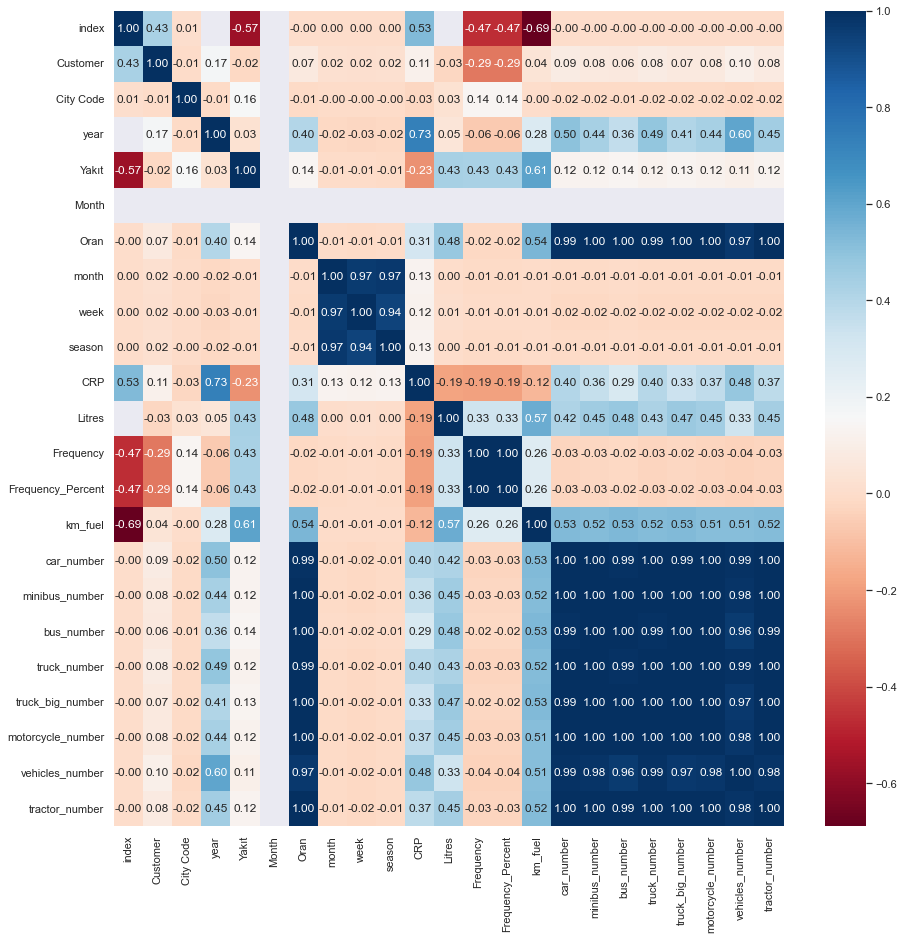

['week',
 'season',
 'Frequency_Percent',
 'car_number',
 'minibus_number',
 'bus_number',
 'truck_number',
 'truck_big_number',
 'motorcycle_number',
 'vehicles_number',
 'tractor_number']

In [78]:
high_correlated_cols(new_df,plot=True)

In [580]:
en_14

,Sütun1,Sütun3
2,-1300,18.209
3,1301 - 1400,14.033
4,1401 - 1500,20.833
5,1501 - 1600,40.720
6,1601 - 2000,4.466
7,2001+,1.598
8,Bilinmiyor-Unknown,0.141


In [79]:
new_df["m1"] = 0
new_df.loc[new_df.year==2014,"m1"] = new_df.loc[new_df.year==2014,"Oran"]*en_14.iloc[0,[1]][0]*t_14
new_df.loc[new_df.year==2015,"m1"] = new_df.loc[new_df.year==2015,"Oran"]*en_15.iloc[0,[1]][0]*t_15
new_df.loc[new_df.year==2016,"m1"] = new_df.loc[new_df.year==2016,"Oran"]*en_16.iloc[0,[1]][0]*t_16
new_df.loc[new_df.year==2017,"m1"] = new_df.loc[new_df.year==2017,"Oran"]*en_17.iloc[0,[1]][0]*t_17
new_df.loc[new_df.year==2018,"m1"] = new_df.loc[new_df.year==2018,"Oran"]*en_18.iloc[0,[1]][0]*t_18
new_df.loc[new_df.year==2019,"m1"] = new_df.loc[new_df.year==2019,"Oran"]*en_19.iloc[0,[1]][0]*t_19

In [80]:
new_df["m2"] = 0
new_df.loc[new_df.year==2014,"m2"] = new_df.loc[new_df.year==2014,"Oran"]*en_14.iloc[1,[1]][0]*t_14
new_df.loc[new_df.year==2015,"m2"] = new_df.loc[new_df.year==2015,"Oran"]*en_15.iloc[1,[1]][0]*t_15
new_df.loc[new_df.year==2016,"m2"] = new_df.loc[new_df.year==2016,"Oran"]*en_16.iloc[1,[1]][0]*t_16
new_df.loc[new_df.year==2017,"m2"] = new_df.loc[new_df.year==2017,"Oran"]*en_17.iloc[1,[1]][0]*t_17
new_df.loc[new_df.year==2018,"m2"] = new_df.loc[new_df.year==2018,"Oran"]*en_18.iloc[1,[1]][0]*t_18
new_df.loc[new_df.year==2019,"m2"] = new_df.loc[new_df.year==2019,"Oran"]*en_19.iloc[1,[1]][0]*t_19

In [81]:
new_df["m3"] = 0
new_df.loc[new_df.year==2014,"m3"] = new_df.loc[new_df.year==2014,"Oran"]*en_14.iloc[2,[1]][0]*t_14
new_df.loc[new_df.year==2015,"m3"] = new_df.loc[new_df.year==2015,"Oran"]*en_15.iloc[2,[1]][0]*t_15
new_df.loc[new_df.year==2016,"m3"] = new_df.loc[new_df.year==2016,"Oran"]*en_16.iloc[2,[1]][0]*t_16
new_df.loc[new_df.year==2017,"m3"] = new_df.loc[new_df.year==2017,"Oran"]*en_17.iloc[2,[1]][0]*t_17
new_df.loc[new_df.year==2018,"m3"] = new_df.loc[new_df.year==2018,"Oran"]*en_18.iloc[2,[1]][0]*t_18
new_df.loc[new_df.year==2019,"m3"] = new_df.loc[new_df.year==2019,"Oran"]*en_19.iloc[2,[1]][0]*t_19

In [82]:
new_df["m4"] = 0
new_df.loc[new_df.year==2014,"m4"] = new_df.loc[new_df.year==2014,"Oran"]*en_14.iloc[3,[1]][0]*t_14
new_df.loc[new_df.year==2015,"m4"] = new_df.loc[new_df.year==2015,"Oran"]*en_15.iloc[3,[1]][0]*t_15
new_df.loc[new_df.year==2016,"m4"] = new_df.loc[new_df.year==2016,"Oran"]*en_16.iloc[3,[1]][0]*t_16
new_df.loc[new_df.year==2017,"m4"] = new_df.loc[new_df.year==2017,"Oran"]*en_17.iloc[3,[1]][0]*t_17
new_df.loc[new_df.year==2018,"m4"] = new_df.loc[new_df.year==2018,"Oran"]*en_18.iloc[3,[1]][0]*t_18
new_df.loc[new_df.year==2019,"m4"] = new_df.loc[new_df.year==2019,"Oran"]*en_19.iloc[3,[1]][0]*t_19

In [83]:
new_df["m5"] = 0
new_df.loc[new_df.year==2014,"m5"] = new_df.loc[new_df.year==2014,"Oran"]*en_14.iloc[4,[1]][0]*t_14
new_df.loc[new_df.year==2015,"m5"] = new_df.loc[new_df.year==2015,"Oran"]*en_15.iloc[4,[1]][0]*t_15
new_df.loc[new_df.year==2016,"m5"] = new_df.loc[new_df.year==2016,"Oran"]*en_16.iloc[4,[1]][0]*t_16
new_df.loc[new_df.year==2017,"m5"] = new_df.loc[new_df.year==2017,"Oran"]*en_17.iloc[4,[1]][0]*t_17
new_df.loc[new_df.year==2018,"m5"] = new_df.loc[new_df.year==2018,"Oran"]*en_18.iloc[4,[1]][0]*t_18
new_df.loc[new_df.year==2019,"m5"] = new_df.loc[new_df.year==2019,"Oran"]*en_19.iloc[4,[1]][0]*t_19

In [84]:
new_df["m6"] = 0
new_df.loc[new_df.year==2014,"m6"] = new_df.loc[new_df.year==2014,"Oran"]*en_14.iloc[5,[1]][0]*t_14
new_df.loc[new_df.year==2015,"m6"] = new_df.loc[new_df.year==2015,"Oran"]*en_15.iloc[5,[1]][0]*t_15
new_df.loc[new_df.year==2016,"m6"] = new_df.loc[new_df.year==2016,"Oran"]*en_16.iloc[5,[1]][0]*t_16
new_df.loc[new_df.year==2017,"m6"] = new_df.loc[new_df.year==2017,"Oran"]*en_17.iloc[5,[1]][0]*t_17
new_df.loc[new_df.year==2018,"m6"] = new_df.loc[new_df.year==2018,"Oran"]*en_18.iloc[5,[1]][0]*t_18
new_df.loc[new_df.year==2019,"m6"] = new_df.loc[new_df.year==2019,"Oran"]*en_19.iloc[5,[1]][0]*t_19

In [85]:
new_df["mun"] = 0
new_df.loc[new_df.year==2014,"mun"] = new_df.loc[new_df.year==2014,"Oran"]*en_14.iloc[6,[1]][0]*t_14
new_df.loc[new_df.year==2015,"mun"] = new_df.loc[new_df.year==2015,"Oran"]*en_15.iloc[6,[1]][0]*t_15
new_df.loc[new_df.year==2016,"mun"] = new_df.loc[new_df.year==2016,"Oran"]*en_16.iloc[6,[1]][0]*t_16
new_df.loc[new_df.year==2017,"mun"] = new_df.loc[new_df.year==2017,"Oran"]*en_17.iloc[6,[1]][0]*t_17
new_df.loc[new_df.year==2018,"mun"] = new_df.loc[new_df.year==2018,"Oran"]*en_18.iloc[6,[1]][0]*t_18
new_df.loc[new_df.year==2019,"mun"] = new_df.loc[new_df.year==2019,"Oran"]*en_19.iloc[6,[1]][0]*t_19

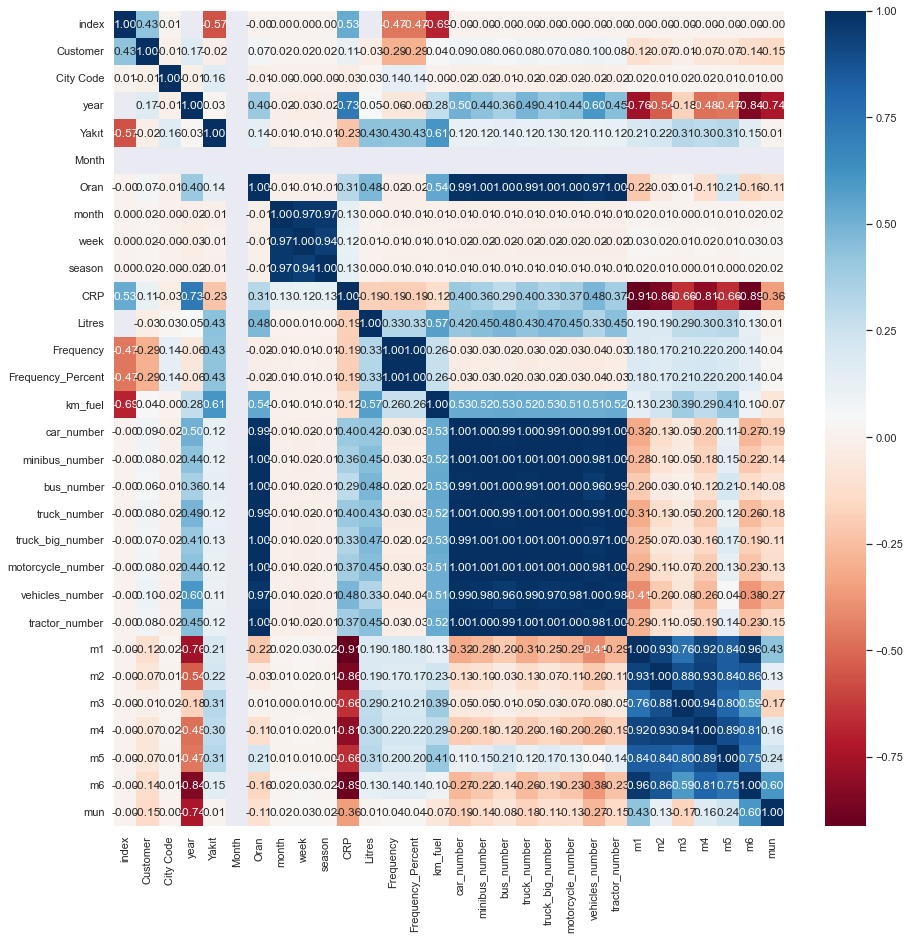

['week',
 'season',
 'Frequency_Percent',
 'car_number',
 'minibus_number',
 'bus_number',
 'truck_number',
 'truck_big_number',
 'motorcycle_number',
 'vehicles_number',
 'tractor_number',
 'm1',
 'm2',
 'm4',
 'm6']

In [86]:
high_correlated_cols(new_df,plot=True)

In [147]:
fuel_14

,Year,Total,Gasoline,Diesel,LPG
0,2014,9857915,2855078,2882885,4076730


In [87]:
new_df["fuel_benzin"] = 0
new_df.loc[(new_df.year==2014)&(new_df.Product=="Benzin"),"fuel_benzin"] = new_df.loc[(new_df.year==2014)&(new_df.Product=="Benzin"),"Oran"]*fuel_14.iloc[0,[2]][0]*t_14
new_df.loc[(new_df.year==2015)&(new_df.Product=="Benzin"),"fuel_benzin"] = new_df.loc[(new_df.year==2015)&(new_df.Product=="Benzin"),"Oran"]*fuel_15.iloc[0,[2]][0]*t_15
new_df.loc[(new_df.year==2016)&(new_df.Product=="Benzin"),"fuel_benzin"] = new_df.loc[(new_df.year==2016)&(new_df.Product=="Benzin"),"Oran"]*fuel_16.iloc[0,[2]][0]*t_16
new_df.loc[(new_df.year==2017)&(new_df.Product=="Benzin"),"fuel_benzin"] = new_df.loc[(new_df.year==2017)&(new_df.Product=="Benzin"),"Oran"]*fuel_17.iloc[0,[2]][0]*t_17
new_df.loc[(new_df.year==2018)&(new_df.Product=="Benzin"),"fuel_benzin"] = new_df.loc[(new_df.year==2018)&(new_df.Product=="Benzin"),"Oran"]*fuel_18.iloc[0,[2]][0]*t_18
new_df.loc[(new_df.year==2019)&(new_df.Product=="Benzin"),"fuel_benzin"] = new_df.loc[(new_df.year==2019)&(new_df.Product=="Benzin"),"Oran"]*fuel_19.iloc[0,[2]][0]*t_19


new_df.loc[(new_df.year==2014)&(new_df.Product=="Motorin"),"fuel_benzin"] = new_df.loc[(new_df.year==2014)&(new_df.Product=="Motorin"),"Oran"]*fuel_14.iloc[0,[3,4]].sum()*t_14
new_df.loc[(new_df.year==2015)&(new_df.Product=="Motorin"),"fuel_benzin"] = new_df.loc[(new_df.year==2015)&(new_df.Product=="Motorin"),"Oran"]*fuel_15.iloc[0,[3,4]].sum()*t_15
new_df.loc[(new_df.year==2016)&(new_df.Product=="Motorin"),"fuel_benzin"] = new_df.loc[(new_df.year==2016)&(new_df.Product=="Motorin"),"Oran"]*fuel_16.iloc[0,[3,4]].sum()*t_16
new_df.loc[(new_df.year==2017)&(new_df.Product=="Motorin"),"fuel_benzin"] = new_df.loc[(new_df.year==2017)&(new_df.Product=="Motorin"),"Oran"]*fuel_17.iloc[0,[3,4]].sum()*t_17
new_df.loc[(new_df.year==2018)&(new_df.Product=="Motorin"),"fuel_benzin"] = new_df.loc[(new_df.year==2018)&(new_df.Product=="Motorin"),"Oran"]*fuel_18.iloc[0,[3,4]].sum()*t_18
new_df.loc[(new_df.year==2019)&(new_df.Product=="Motorin"),"fuel_benzin"] = new_df.loc[(new_df.year==2019)&(new_df.Product=="Motorin"),"Oran"]*fuel_19.iloc[0,[3,4]].sum()*t_19

In [591]:
new_df["fuel_motorin"] = 0
new_df.loc[(new_df.year==2014)&(new_df.Product=="Motorin"),"fuel_motorin"] = new_df.loc[(new_df.year==2014)&(new_df.Product=="Motorin"),"Frequency_Percent"]*fuel_14.iloc[0,[3,4]].sum()*100
new_df.loc[(new_df.year==2015)&(new_df.Product=="Motorin"),"fuel_motorin"] = new_df.loc[(new_df.year==2015)&(new_df.Product=="Motorin"),"Frequency_Percent"]*fuel_15.iloc[0,[3,4]].sum()*100
new_df.loc[(new_df.year==2016)&(new_df.Product=="Motorin"),"fuel_motorin"] = new_df.loc[(new_df.year==2016)&(new_df.Product=="Motorin"),"Frequency_Percent"]*fuel_16.iloc[0,[3,4]].sum()*100
new_df.loc[(new_df.year==2017)&(new_df.Product=="Motorin"),"fuel_motorin"] = new_df.loc[(new_df.year==2017)&(new_df.Product=="Motorin"),"Frequency_Percent"]*fuel_17.iloc[0,[3,4]].sum()*100
new_df.loc[(new_df.year==2018)&(new_df.Product=="Motorin"),"fuel_motorin"] = new_df.loc[(new_df.year==2018)&(new_df.Product=="Motorin"),"Frequency_Percent"]*fuel_18.iloc[0,[3,4]].sum()*100
new_df.loc[(new_df.year==2019)&(new_df.Product=="Motorin"),"fuel_motorin"] = new_df.loc[(new_df.year==2019)&(new_df.Product=="Motorin"),"Frequency_Percent"]*fuel_19.iloc[0,[3,4]].sum()*100

In [592]:
new_df["fuel_benzin_to"] = 1
new_df.loc[(new_df.year==2014)&(new_df.Product=="Benzin"),"fuel_benzin_to"] = new_df.loc[(new_df.year==2014),"fuel_benzin_to"]*fuel_14.iloc[0,[2]][0]
new_df.loc[(new_df.year==2015)&(new_df.Product=="Benzin"),"fuel_benzin_to"] = new_df.loc[(new_df.year==2015),"fuel_benzin_to"]*fuel_15.iloc[0,[2]][0]
new_df.loc[(new_df.year==2016)&(new_df.Product=="Benzin"),"fuel_benzin_to"] = new_df.loc[(new_df.year==2016),"fuel_benzin_to"]*fuel_16.iloc[0,[2]][0]
new_df.loc[(new_df.year==2017)&(new_df.Product=="Benzin"),"fuel_benzin_to"] = new_df.loc[(new_df.year==2017),"fuel_benzin_to"]*fuel_17.iloc[0,[2]][0]
new_df.loc[(new_df.year==2018)&(new_df.Product=="Benzin"),"fuel_benzin_to"] = new_df.loc[(new_df.year==2018),"fuel_benzin_to"]*fuel_18.iloc[0,[2]][0]
new_df.loc[(new_df.year==2019)&(new_df.Product=="Benzin"),"fuel_benzin_to"] = new_df.loc[(new_df.year==2019),"fuel_benzin_to"]*fuel_19.iloc[0,[2]][0]

new_df.loc[(new_df.year==2014)&(new_df.Product=="Motorin"),"fuel_benzin_to"] = new_df.loc[(new_df.year==2014),"fuel_benzin_to"]*fuel_14.iloc[0,[3,4]].sum()
new_df.loc[(new_df.year==2015)&(new_df.Product=="Motorin"),"fuel_benzin_to"] = new_df.loc[(new_df.year==2015),"fuel_benzin_to"]*fuel_15.iloc[0,[3,4]].sum()
new_df.loc[(new_df.year==2016)&(new_df.Product=="Motorin"),"fuel_benzin_to"] = new_df.loc[(new_df.year==2016),"fuel_benzin_to"]*fuel_16.iloc[0,[3,4]].sum()
new_df.loc[(new_df.year==2017)&(new_df.Product=="Motorin"),"fuel_benzin_to"] = new_df.loc[(new_df.year==2017),"fuel_benzin_to"]*fuel_17.iloc[0,[3,4]].sum()
new_df.loc[(new_df.year==2018)&(new_df.Product=="Motorin"),"fuel_benzin_to"] = new_df.loc[(new_df.year==2018),"fuel_benzin_to"]*fuel_18.iloc[0,[3,4]].sum()
new_df.loc[(new_df.year==2019)&(new_df.Product=="Motorin"),"fuel_benzin_to"] = new_df.loc[(new_df.year==2019),"fuel_benzin_to"]*fuel_19.iloc[0,[3,4]].sum()

In [593]:
new_df["fuel_motorin_to"] = 1
new_df.loc[(new_df.year==2014)&(new_df.Product=="Motorin"),"fuel_motorin_to"] = new_df.loc[(new_df.year==2014),"fuel_motorin_to"]*fuel_14.iloc[0,[3,4]].sum()
new_df.loc[(new_df.year==2015)&(new_df.Product=="Motorin"),"fuel_motorin_to"] = new_df.loc[(new_df.year==2015),"fuel_motorin_to"]*fuel_15.iloc[0,[3,4]].sum()
new_df.loc[(new_df.year==2016)&(new_df.Product=="Motorin"),"fuel_motorin_to"] = new_df.loc[(new_df.year==2016),"fuel_motorin_to"]*fuel_16.iloc[0,[3,4]].sum()
new_df.loc[(new_df.year==2017)&(new_df.Product=="Motorin"),"fuel_motorin_to"] = new_df.loc[(new_df.year==2017),"fuel_motorin_to"]*fuel_17.iloc[0,[3,4]].sum()
new_df.loc[(new_df.year==2018)&(new_df.Product=="Motorin"),"fuel_motorin_to"] = new_df.loc[(new_df.year==2018),"fuel_motorin_to"]*fuel_18.iloc[0,[3,4]].sum()
new_df.loc[(new_df.year==2019)&(new_df.Product=="Motorin"),"fuel_motorin_to"] = new_df.loc[(new_df.year==2019),"fuel_motorin_to"]*fuel_19.iloc[0,[3,4]].sum()

In [599]:
new_df.drop(["fuel_motorin_to"],axis=1,inplace=True)

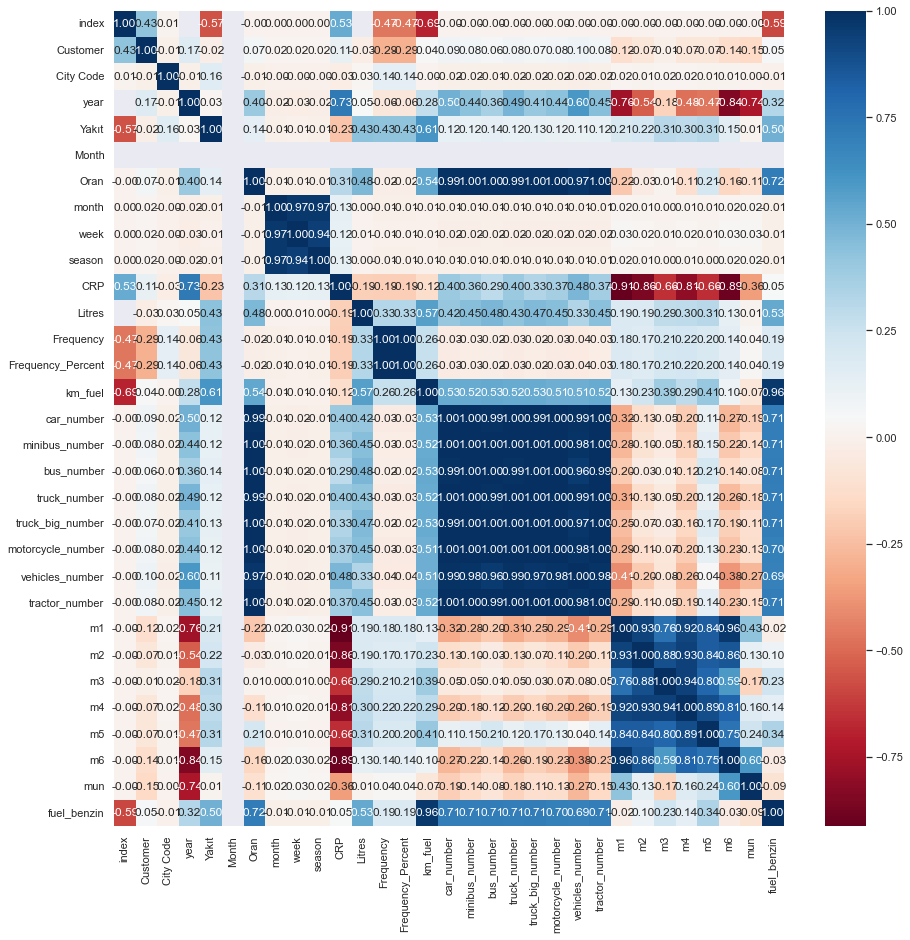

['week',
 'season',
 'Frequency_Percent',
 'car_number',
 'minibus_number',
 'bus_number',
 'truck_number',
 'truck_big_number',
 'motorcycle_number',
 'vehicles_number',
 'tractor_number',
 'm1',
 'm2',
 'm4',
 'm6',
 'fuel_benzin']

In [88]:
high_correlated_cols(new_df,plot=True)

In [655]:
#new_df["m1_car"] = new_df["m1"]*(new_df["car_numbers"] # engine vs number of vehicles

In [89]:
# verideki türleri ayrıştıralım
def grab_col(dataframe,cat_threshold=10,car_threshold=20):
    cat_cols=[col for col in dataframe.columns if dataframe[col].dtypes in ["object","category","bool"]]
    num_but_cat=[col for col in dataframe.columns if dataframe[col].dtypes in ["int64","float64"] and dataframe[col].nunique()<=cat_threshold]
    num_cols=[col for col in dataframe.columns if dataframe[col].dtypes in ["int64","float64"] and col not in num_but_cat]
    cat_but_car=[col for col in cat_cols if dataframe[col].nunique()>car_threshold]
    cat_cols=cat_cols+num_but_cat
    cat_cols=[col for col in cat_cols if col not in cat_but_car]
    print(f"Observations:{dataframe.shape[0]}")
    print(f"Variables:{dataframe.shape[1]}")
    print(f"cat_cols:{len(cat_cols)}")
    print(f"num_cols:{len(num_cols)}")
    print(f"cat_but_car:{len(cat_but_car)}")
    print(f"num_but_cat:{len(num_but_cat)}")

    return cat_cols,num_cols,cat_but_car

In [90]:
cat_cols,num_cols,cat_but_car = grab_col(new_df)

Observations:1467957
Variables:36
cat_cols:6
num_cols:27
cat_but_car:0
num_but_cat:3


In [91]:
cat_cols

['Area', 'Product', 'ind', 'year', 'Month', 'season']

In [92]:
num_cols

['index',
 'Customer',
 'City Code',
 'Yakıt',
 'Oran',
 'month',
 'CRP',
 'Litres',
 'Frequency',
 'Frequency_Percent',
 'km_fuel',
 'car_number',
 'minibus_number',
 'bus_number',
 'truck_number',
 'truck_big_number',
 'motorcycle_number',
 'vehicles_number',
 'tractor_number',
 'm1',
 'm2',
 'm3',
 'm4',
 'm5',
 'm6',
 'mun',
 'fuel_benzin']

In [93]:
cat_cols = ['Area',"season","year","Month",
 'Product'
]

In [94]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [95]:
new_df_train = one_hot_encoder(new_df,cat_cols)

In [96]:
# Custom Cost Function
########################

# MAE, MSE, RMSE, SSE

# MAE: mean absolute error
# MAPE: mean absolute percentage error
# SMAPE: Symmetric mean absolute percentage error (adjusted MAPE)
def smape(preds, target):
    n = len(preds)
    masked_arr = ~((preds == 0) & (target == 0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds - target)
    denom = np.abs(preds) + np.abs(target)
    smape_val = (200 * np.sum(num / denom)) / n
    return smape_val


def lgbm_smape(preds, train_data):
    labels = train_data.get_label()
    smape_val = smape(np.expm1(preds), np.expm1(labels))
    return 'SMAPE', smape_val, False

In [109]:
test, train = new_df_train[new_df_train["ind"].eq("test")], new_df_train[new_df_train["ind"].eq("train")]

In [98]:
test, train = new_df[new_df["ind"].eq("test")], new_df[new_df["ind"].eq("train")]

In [110]:
train.drop(["index","City Code","date_of_price","Billing Date","ind"],axis=1,inplace=True)

C:\Users\akdog\AppData\Local\Temp\ipykernel_12424\1652179095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(["index","City Code","date_of_price","Billing Date","ind"],axis=1,inplace=True)


In [111]:
# Converting sales to log(1+sales) # train süresini kısaltmak amacıyla
train['Litres'] = np.log1p(train["Litres"].values)

C:\Users\akdog\AppData\Local\Temp\ipykernel_12424\24904409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Litres'] = np.log1p(train["Litres"].values)


In [112]:
X = train.drop(["Customer","week","Litres"],axis=1)
y = train["Litres"]

In [113]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=24)

In [191]:
#cols = ['CRP', 'Frequency', 'Frequency_Percent', 'km_fuel', 'car_number', 'minibus_number', 'bus_number', 'truck_number', 'motorcycle_number', 'vehicles_number', 'truck_big_number', 'tractor_number', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'mun', 'fuel_benzin', 'fuel_motorin', 'month', 'Area_Doğu Anadolu Bölgesi', 'Area_Ege Bölgesi', 'Area_Güneydoğu Anadolu Bölgesi', 'Area_Karadeniz Bölgesi', 'Area_Marmara Bölgesi',
 #      'Area_İç Anadolu Bölgesi', 'Product_Motorin', 'Plant_T102', 'Plant_T105', 'Plant_T107', 'Plant_T108', 'Plant_T110', 'Plant_T111', 'Plant_T112', 'Plant_T113', 'Plant_T120', 'Plant_T155', 'Plant_T248', 'Plant_T314', 'Plant_T317', 'Plant_T318', 'Plant_T327', 'Plant_T329', 'year_2015', 'year_2016', 'year_2017', 'year_2018']

In [105]:
import lightgbm as lgb

In [114]:
list(X.columns)

['Yakıt',
 'Oran',
 'month',
 'CRP',
 'Frequency',
 'Frequency_Percent',
 'km_fuel',
 'car_number',
 'minibus_number',
 'bus_number',
 'truck_number',
 'truck_big_number',
 'motorcycle_number',
 'vehicles_number',
 'tractor_number',
 'm1',
 'm2',
 'm3',
 'm4',
 'm5',
 'm6',
 'mun',
 'fuel_benzin',
 'Area_Doğu Anadolu Bölgesi',
 'Area_Ege Bölgesi',
 'Area_Güneydoğu Anadolu Bölgesi',
 'Area_Karadeniz Bölgesi',
 'Area_Marmara Bölgesi',
 'Area_İç Anadolu Bölgesi',
 'season_2',
 'season_3',
 'season_4',
 'year_2015',
 'year_2016',
 'year_2017',
 'year_2018',
 'year_2019',
 'Product_Motorin']

In [115]:
cols = ['Yakıt',
 'Oran',
 'month',
 'CRP',
 'Frequency',
 'Frequency_Percent',
 'km_fuel',
 'car_number',
 'minibus_number',
 'bus_number',
 'truck_number',
 'truck_big_number',
 'motorcycle_number',
 'vehicles_number',
 'tractor_number',
 'm1',
 'm2',
 'm3',
 'm4',
 'm5',
 'm6',
 'mun',
 'fuel_benzin',
 'Area_Doğu Anadolu Bölgesi',
 'Area_Ege Bölgesi',
 'Area_Güneydoğu Anadolu Bölgesi',
 'Area_Karadeniz Bölgesi',
 'Area_Marmara Bölgesi',
 'Area_İç Anadolu Bölgesi',
 'season_2',
 'season_3',
 'season_4',
 'year_2015',
 'year_2016',
 'year_2017',
 'year_2018',
 'year_2019',
 'Product_Motorin']

In [116]:
# LightGBM ile Zaman Serisi Modeli

# !pip install lightgbm
# conda install lightgbm


# LightGBM parameters
lgb_params = {'num_leaves': 2,
              "objective": "regression",
              "boosting_type": "gbdt",
              'learning_rate': 0.06,
              'feature_fraction': 0.8,
              'max_depth': 5,
              'verbose': -1,
              'num_boost_round': 10000,
              'early_stopping_rounds':200,
              'nthread': -1}

# metric mae: l1, absolute loss, mean_absolute_error, regression_l1
# mse: l2, square loss, mean_squared_error, mse, regression_l2, regression
# rmse, root square loss, root_mean_squared_error, l2_root
# mape, MAPE loss, mean_absolute_percentage_error

# num_leaves: bir ağaçtaki maksimum yaprak sayısı
# learning_rate: shrinkage_rate, eta
# feature_fraction: rf'nin random subspace özelliği. her iterasyonda rastgele göz önünde bulundurulacak değişken sayısı.
# max_depth: maksimum derinlik
# num_boost_round: n_estimators, number of boosting iterations. En az 10000-15000 civarı yapmak lazım.

# early_stopping_rounds: validasyon setindeki metrik belirli bir early_stopping_rounds'da ilerlemiyorsa yani
# hata düşmüyorsa modellemeyi durdur.
# hem train süresini kısaltır hem de overfit'e engel olur.
# nthread: num_thread, nthread, nthreads, n_jobs

lgbtrain = lgb.Dataset(data=X_train, label=y_train, feature_name=cols)

lgbval = lgb.Dataset(data=X_test, label=y_test, reference=lgbtrain, feature_name=cols)

model = lgb.train(lgb_params, lgbtrain,
                  valid_sets=[lgbtrain, lgbval],
                  num_boost_round=lgb_params['num_boost_round'],
                  early_stopping_rounds=lgb_params['early_stopping_rounds'],
                  feval=lgbm_smape,
                  verbose_eval=100)

y_pred_vawl = model.predict(X_test, num_iteration=model.best_iteration)

C:\Users\akdog\.conda\envs\spyder\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\akdog\.conda\envs\spyder\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\akdog\.conda\envs\spyder\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 200 rounds
[100]	training's l2: 3.51972	training's SMAPE: 58.426	valid_1's l2: 3.51196	valid_1's SMAPE: 58.4174
[200]	training's l2: 3.502	training's SMAPE: 58.8136	valid_1's l2: 3.49493	valid_1's SMAPE: 58.8032
Early stopping, best iteration is:
[62]	training's l2: 3.54086	training's SMAPE: 58.259	valid_1's l2: 3.53214	valid_1's SMAPE: 58.2485


In [117]:
import catboost as cb
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

In [203]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [204]:
model = cb.CatBoostRegressor(loss_function="RMSE")

In [205]:
grid = {'iterations': [100,200],
        'learning_rate': [0.06],
        'depth': [10],
        'l2_leaf_reg': [0.1,0.2
                       ]}
model.grid_search(grid, train_dataset)

0:	learn: 49479.8100059	test: 49477.7977423	best: 49477.7977423 (0)	total: 306ms	remaining: 30.3s
1:	learn: 47264.4386151	test: 47262.0861327	best: 47262.0861327 (1)	total: 348ms	remaining: 17.1s
2:	learn: 45201.2197438	test: 45199.6124662	best: 45199.6124662 (2)	total: 501ms	remaining: 16.2s
3:	learn: 43315.2517497	test: 43313.8364680	best: 43313.8364680 (3)	total: 551ms	remaining: 13.2s
4:	learn: 41554.5061076	test: 41552.2198223	best: 41552.2198223 (4)	total: 708ms	remaining: 13.5s
5:	learn: 39932.9600311	test: 39928.9631831	best: 39928.9631831 (5)	total: 866ms	remaining: 13.6s
6:	learn: 38437.5236805	test: 38433.6084174	best: 38433.6084174 (6)	total: 1.01s	remaining: 13.4s
7:	learn: 37063.4898762	test: 37060.8825813	best: 37060.8825813 (7)	total: 1.16s	remaining: 13.4s
8:	learn: 35812.9349705	test: 35811.0040624	best: 35811.0040624 (8)	total: 1.31s	remaining: 13.3s
9:	learn: 34659.7749780	test: 34659.8725540	best: 34659.8725540 (9)	total: 1.47s	remaining: 13.2s
10:	learn: 33602.145

{'params': {'depth': 10,
  'iterations': 200,
  'learning_rate': 0.06,
  'l2_leaf_reg': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
              

In [206]:
pred = model.predict(X_test)

3.532144632090336


C:\Users\akdog\.conda\envs\spyder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


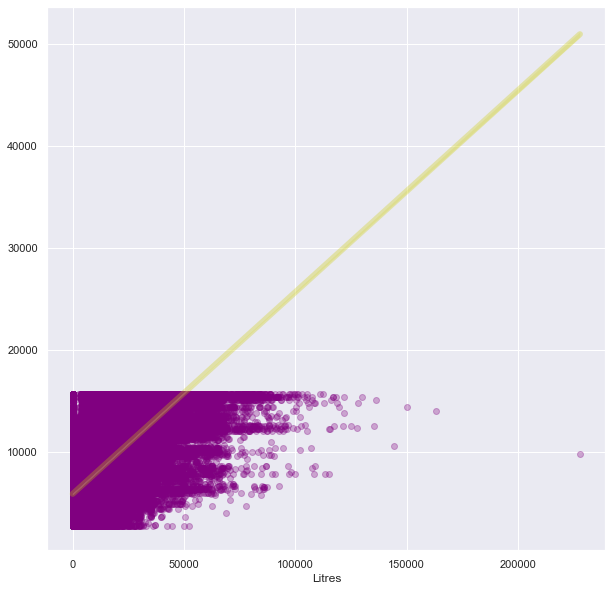

In [120]:
from sklearn import metrics
print(metrics.mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred_vawl)))
    
plt.figure(figsize=(10,10))
sns.regplot(np.expm1(y_test), np.expm1(y_pred_vawl), fit_reg=True,scatter_kws = {"color": "purple", "alpha": 0.3}, line_kws = {"color": "#CCCC00", "alpha": 0.3, "lw":6},truncate = True)
sns.set_style("whitegrid")

                           feature  split   gain
4                        Frequency     29 36.699
1                             Oran     13 23.588
6                          km_fuel      3 15.581
37                 Product_Motorin      3 14.620
5                Frequency_Percent      3  3.377
0                            Yakıt      3  2.440
13                 vehicles_number      5  2.036
7                       car_number      1  1.117
3                              CRP      2  0.543
35                       year_2018      0  0.000
34                       year_2017      0  0.000
33                       year_2016      0  0.000
32                       year_2015      0  0.000
36                       year_2019      0  0.000
23       Area_Doğu_Anadolu_Bölgesi      0  0.000
30                        season_3      0  0.000
29                        season_2      0  0.000
28         Area_İç_Anadolu_Bölgesi      0  0.000
27            Area_Marmara_Bölgesi      0  0.000
26          Area_Kar

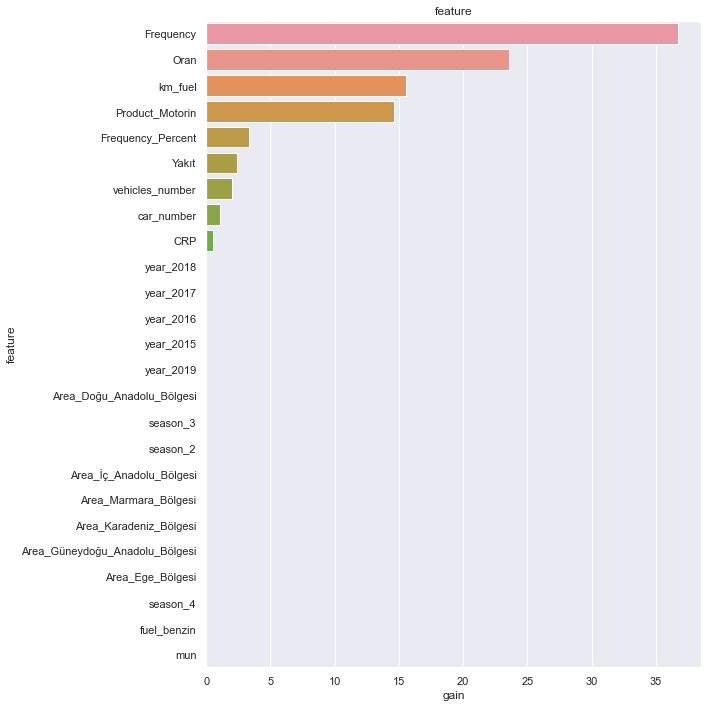

                           feature  split   gain
4                        Frequency     29 36.699
1                             Oran     13 23.588
6                          km_fuel      3 15.581
37                 Product_Motorin      3 14.620
5                Frequency_Percent      3  3.377
0                            Yakıt      3  2.440
13                 vehicles_number      5  2.036
7                       car_number      1  1.117
3                              CRP      2  0.543
35                       year_2018      0  0.000
34                       year_2017      0  0.000
33                       year_2016      0  0.000
32                       year_2015      0  0.000
36                       year_2019      0  0.000
23       Area_Doğu_Anadolu_Bölgesi      0  0.000
30                        season_3      0  0.000
29                        season_2      0  0.000
28         Area_İç_Anadolu_Bölgesi      0  0.000
27            Area_Marmara_Bölgesi      0  0.000
26          Area_Kar

15

In [121]:
# Değişken Önem Düzeyleri
########################

def plot_lgb_importances(model, plot=False, num=10):
    gain = model.feature_importance('gain')
    feat_imp = pd.DataFrame({'feature': model.feature_name(),
                             'split': model.feature_importance('split'),
                             'gain': 100 * gain / gain.sum()}).sort_values('gain', ascending=False)
    if plot:
        plt.figure(figsize=(10, 10))
        sns.set(font_scale=1)
        sns.barplot(x="gain", y="feature", data=feat_imp[0:25])
        plt.title('feature')
        plt.tight_layout()
        plt.show()
    else:
        print(feat_imp.head(num))
    return feat_imp

plot_lgb_importances(model, num=200)

plot_lgb_importances(model, num=30, plot=True)


feat_imp = plot_lgb_importances(model, num=200)

importance_zero = feat_imp[feat_imp["gain"] == 0]["feature"].values

imp_feats = [col for col in cols if col not in importance_zero]
len(imp_feats)

In [122]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test,pred)

NameError: name 'pred' is not defined

In [125]:
new_test = test.drop(["index","Customer","date_of_price","week","ind","Litres","City Code","Billing Date"],axis=1)

In [126]:
new_test

,Yakıt,Oran,month,CRP,Frequency,Frequency_Percent,km_fuel,car_number,minibus_number,bus_number,truck_number,truck_big_number,motorcycle_number,vehicles_number,tractor_number,m1,m2,m3,m4,m5,m6,mun,fuel_benzin,Area_Doğu Anadolu Bölgesi,Area_Ege Bölgesi,Area_Güneydoğu Anadolu Bölgesi,Area_Karadeniz Bölgesi,Area_Marmara Bölgesi,Area_İç Anadolu Bölgesi,season_2,season_3,season_4,year_2015,year_2016,year_2017,year_2018,year_2019,Product_Motorin
0,13617.500,1.000,1,5.760,870,0.059,1.802,2014241.194,79482.390,34371.974,611683.651,136045.889,536676.619,10547.217,307539.739,2886.751,3876.066,6711.426,9358.299,1456.827,284.825,17.077,1519401.923,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
1,13617.500,1.000,1,5.940,870,0.059,1.802,2014241.194,79482.390,34371.974,611683.651,136045.889,536676.619,10547.217,307539.739,2886.751,3876.066,6711.426,9358.299,1456.827,284.825,17.077,1519401.923,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
2,13617.500,0.381,1,6.140,870,0.059,0.687,767425.895,30282.791,13095.722,233051.471,51833.484,204473.792,4018.490,117172.641,1099.852,1476.781,2557.053,3565.512,555.051,108.518,6.506,578892.133,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
3,13617.500,0.381,1,6.140,870,0.059,0.687,767425.895,30282.791,13095.722,233051.471,51833.484,204473.792,4018.490,117172.641,1099.852,1476.781,2557.053,3565.512,555.051,108.518,6.506,578892.133,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
4,13617.500,0.381,2,6.140,870,0.059,0.687,767425.895,30282.791,13095.722,233051.471,51833.484,204473.792,4018.490,117172.641,1099.852,1476.781,2557.053,3565.512,555.051,108.518,6.506,578892.133,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362934,803.800,1.000,12,7.110,55,0.004,0.158,2014241.194,79482.390,34371.974,611683.651,136045.889,536676.619,10547.217,307539.739,2886.751,3876.066,6711.426,9358.299,1456.827,284.825,17.077,486524.739,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1362935,803.800,0.381,12,7.110,55,0.004,0.060,767425.895,30282.791,13095.722,233051.471,51833.484,204473.792,4018.490,117172.641,1099.852,1476.781,2557.053,3565.512,555.051,108.518,6.506,185365.925,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1362936,803.800,1.000,12,7.110,55,0.004,0.158,2014241.194,79482.390,34371.974,611683.651,136045.889,536676.619,10547.217,307539.739,2886.751,3876.066,6711.426,9358.299,1456.827,284.825,17.077,486524.739,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1362937,803.800,0.381,12,7.110,55,0.004,0.060,767425.895,30282.791,13095.722,233051.471,51833.484,204473.792,4018.490,117172.641,1099.852,1476.781,2557.053,3565.512,555.051,108.518,6.506,185365.925,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [133]:
y_pred = model.predict(new_test)
y_pred = np.expm1(y_pred)

In [134]:
st = pd.read_csv("test.csv") 

In [135]:
st["Litres"] = 0
st.loc[:108367,"Litres"] = y_pred
st.loc[108368:,"Litres"] = y_pred.mean()

In [136]:
cc = st[["index","Litres"]]

In [137]:
cc.to_csv("merge_data2.csv",index=False)

In [212]:
(cc["Litres"]==1).any()

False

In [349]:
import pandas as pd
new = pd.read_csv("new_s.csv")
data_4 = pd.read_csv("data4.csv")
game = pd.read_csv("game.csv")
gg = pd.read_csv("gg.csv")

In [351]:
from sklearn.metrics import  mean_squared_log_error
mean_squared_log_error(new["Litres"].values,cc["Litres"].values)

0.3381942382701145

In [353]:
from sklearn.metrics import  mean_squared_log_error
mean_squared_log_error(game["Litres"].values,cc["Litres"].values)

0.593739963018313

In [138]:
cc

,index,Litres
0,0,11297.764
1,1,11297.764
2,2,11297.764
3,3,11297.764
4,4,11297.764
...,...,...
108467,108467,8003.108
108468,108468,8003.108
108469,108469,8003.108
108470,108470,8003.108
